In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from matplotlib import cm
import pickle
import sys
import os
file_path = 'C:/Users/dB/deBivort/projects/ALVariability/'
proj_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
sys.path.append(proj_dir)
from utils.plot_utils import set_font_sizes
from utils.data_utils import make_df_AL_activity_long, make_orn_upn_frs, make_glomerular_odor_responses
set_font_sizes()

In [2]:
project_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
df_neur_ids = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/df_neur_ids.csv'), index_col=0)
al_block = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/AL_block.csv'), index_col=0)
al_block.columns = al_block.columns.astype(np.int64)
al_block.index = al_block.index.astype(np.int64)
imput_table = pd.read_csv(os.path.join(project_dir, 'odor_imputation/df_odor_door_all_odors_imput_ALS.csv'), index_col=0)

In [3]:
d_sims_fpath = '../run_model/save_sims_synapticNoise_ORNs_LNs_PNs/d_sims_res_df_AL_activities_2021_7_1-13_32_21.p'
d_sims = pickle.load(open(d_sims_fpath, 'rb'))

In [4]:
sim_dirs = list(d_sims.keys())
sim_dirs[:5]

['2021_6_30-4_2_13__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise_LN__0.2_4_2_13',
 '2021_6_30-3_46_43__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise_ORN__0.2_3_46_43',
 '2021_6_30-4_33_21__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise_ORN_LN_PN__0.2_4_33_21',
 '2021_6_30-16_30_44__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise_ORN_LN_PN__1.0_16_30_44',
 '2021_6_30-3_41_33__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise_ORN__0.2_3_41_33']

In [5]:
len(sim_dirs)

564

In [6]:
orn_set = [f for f in sim_dirs if 'synNoise_ORN__' in f]
ln_set = [f for f in sim_dirs if 'synNoise_LN__' in f]
pn_set = [f for f in sim_dirs if 'synNoise_PN__' in f]

ln_pn_set = [f for f in sim_dirs if 'synNoise_LN_umPN__' in f]
orn_pn_set = [f for f in sim_dirs if 'synNoise_ORN_PN__' in f]
orn_ln_set = [f for f in sim_dirs if 'synNoise_ORN_LN__' in f]

none_set = [f for f in sim_dirs if 'synNoise__' in f]
all_02_set = [f for f in sim_dirs if 'synNoise_ORN_LN_PN__0.2' in f]
all_05_set = [f for f in sim_dirs if 'synNoise_ORN_LN_PN__0.5' in f]
all_10_set = [f for f in sim_dirs if 'synNoise_ORN_LN_PN__1.0' in f]

list_of_sets = [none_set, orn_set, ln_set, pn_set, 
                #ln_pn_set, orn_pn_set, orn_ln_set, 
                all_02_set, all_05_set, all_10_set]
#list_of_sets = [none_set, orn_set, ln_set, pn_set, all_set]

set_names = ['No synaptic noise', 
             '+ ORN N(0, 20%) noise', 
             '+ LN N(0, 20%) noise', 
             '+ PN N(0, 20%) noise',
             #'+ LN + PN', '+ ORN + PN', '+ ORN + LN',
             'N(0, 20%) noise',
             'N(0, 50%) noise',
             'N(0, 100%) noise']
#set_names = ['no resampling', '+ ORN', '+ LN', '+ PN', '+ ORN + LN + PN']


all_sims = np.concatenate(list_of_sets)
all_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets[i]) for i in range(len(list_of_sets))])

In [7]:
master_fig_dir = os.path.join(os.curdir, 'figs')
if not os.path.exists(master_fig_dir):
    os.makedirs(master_fig_dir)
resampling_fig_dir = os.path.join(master_fig_dir, 'synNoise_ORNs_LNs_PNs_plots')
if not os.path.exists(resampling_fig_dir):
    os.makedirs(resampling_fig_dir)

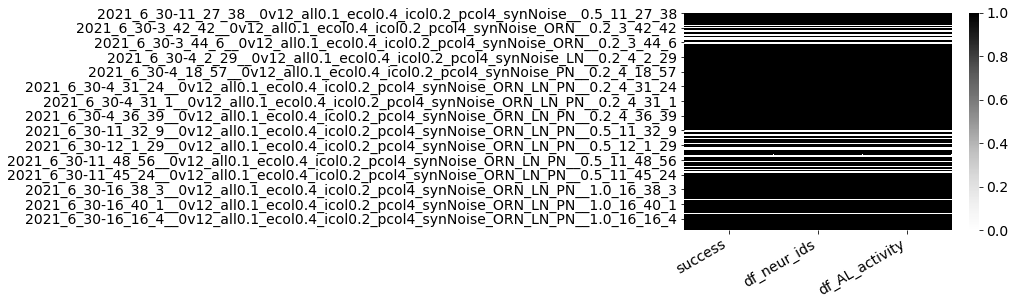

In [8]:
sim_info_fields = np.array(['success', 'df_neur_ids', 'df_AL_activity'])
success_pos = np.where(sim_info_fields == 'success')[0][0]

df_sim_info = []
for i in range(len(all_sims)):
    s = all_sims[i]
    sim_keys = list(d_sims[s].keys())
    present_keys = [f in sim_keys for f in sim_info_fields]
    present_keys[success_pos] = d_sims[s]['success']
    #r = pd.Series(present_keys, name=all_sims_short_names[i]).T
    r = pd.Series(present_keys, name=s).T
    df_sim_info.append(r)
df_sim_info = pd.concat(df_sim_info, 1).T
df_sim_info.columns = sim_info_fields
df_sim_info = df_sim_info.astype(int)

plt.figure()
sns.heatmap(df_sim_info, cmap='Greys')
plt.xticks(rotation=30, ha='right')
plt.show()

In [9]:
df_sim_info.iloc[:5]

,success,df_neur_ids,df_AL_activity
2021_6_30-11_27_38__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise__0.5_11_27_38,1,1,1
2021_6_30-3_39_18__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise__0.2_3_39_18,1,1,1
2021_6_30-11_27_53__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise__0.5_11_27_53,1,1,1
2021_6_30-3_37_21__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise__0.2_3_37_21,1,1,1
2021_6_30-3_36_14__0v12_all0.1_ecol0.4_icol0.2_pcol4_synNoise__0.2_3_36_14,1,1,1


In [10]:
list_of_sets_good_sims = [df_sim_info[(df_sim_info.success == 1) & 
                                      (df_sim_info.index.isin(cur_set))].index.values \
                          for cur_set in list_of_sets]
all_good_sims = np.concatenate(list_of_sets_good_sims)
all_good_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets_good_sims[i])\
                                            for i in range(len(list_of_sets_good_sims))])

In [11]:
[len(x) for x in list_of_sets_good_sims], len(all_good_sims)

([32, 27, 50, 50, 120, 80, 138], 497)

In [12]:
al_block1 = pd.read_csv('../run_model/save_sims_synapticNoise_ORNs_LNs_PNs/al_block_blank1.csv', index_col=0)
al_block2 = pd.read_csv('../run_model/save_sims_synapticNoise_ORNs_LNs_PNs/al_block_blank2.csv', index_col=0)

In [13]:
np.all(al_block1 == al_block2)

True

In [14]:
#df_char_ids = d_sims[good_orn_set[0]]['df_char_ids']
#hemi_gloms = df_char_ids[df_char_ids['altype'] == 'ORN']['glom'].unique()
hemi_gloms = np.array(['DA1', 'VC5', 'VA1v', 'VA1d', 'VA2', 'VA6', 'DM1', 'DL3', 'DL1',
       'VL2a', 'VM4', 'VM5d', 'DM2', 'VL1', 'DM3', 'DM4', 'DM6', 'DL4',
       'VC3l', 'DC3', 'VM7d', 'V', 'VL2p', 'VM1', 'VC3m', 'DC1', 'DL5',
       'D', 'DP1m', 'VM5v', 'DA3', 'VC4', 'DA2', 'VA7m', 'VA3', 'DP1l',
       'DC4', 'VC2', 'VA4', 'DC2', 'VM7v', 'DM5', 'DL2v', 'VM3', 'VC1',
       'VA5', 'DL2d', 'VA7l', 'DA4l', 'DA4m', 'VM2'])

thermo_hygro_glomeruli = np.array(['VP1d', 'VP1l', 'VP1m', 'VP2', 'VP3', 'VP4', 'VP5'])

sim_odors = np.array(['3-octanol',
                        '1-hexanol',
                        'ethyl lactate',
                        #'citronella',
                        '2-heptanone',
                        '1-pentanol',
                        'ethanol',
                        'geranyl acetate',
                        'hexyl acetate',
                        '4-methylcyclohexanol',
                        'pentyl acetate',
                        '1-butanol'])

odor_names = sim_odors

MAC_gloms = ['DC2', 'DL5', 'DM1', 'DM2', 'DM3']

In [15]:
def get_sim_MAC_responses(df_AL_activity, sub_pre=0):
    df_orn_frs_onoff, df_upn_frs_onoff = make_orn_upn_frs(df_AL_activity, sim_odors, df_neur_ids.reset_index(),
                                                          sub_pre=sub_pre, olf_only=1)
    df_orn_glom_onoff, df_upn_glom_onoff = \
            make_glomerular_odor_responses(df_orn_frs_onoff, df_upn_frs_onoff, df_AL_activity)

    return df_upn_glom_onoff.loc[:, sim_odors]#.loc[MAC_gloms, sim_odors]

In [16]:
list_of_df_responses_resamples_subpre = []
list_of_df_responses_resamples_nosubpre = []

for i in range(len(list_of_sets_good_sims)):
    good_set = list_of_sets_good_sims[i]
    print(set_names[i])
    good_set_df_sim_MAC_frs_subpre = []
    good_set_df_sim_MAC_frs_nosubpre = []
    
    for k in good_set:
        d_ind_sim = d_sims[k]
        df_AL_activity = d_ind_sim['df_AL_activity']
        
        df_sim_MAC_frs_subpre = get_sim_MAC_responses(df_AL_activity, sub_pre=1)
        df_sim_MAC_frs_nosubpre = get_sim_MAC_responses(df_AL_activity, sub_pre=0)
        
        good_set_df_sim_MAC_frs_subpre.append(df_sim_MAC_frs_subpre)
        good_set_df_sim_MAC_frs_nosubpre.append(df_sim_MAC_frs_nosubpre)
                
    df_odor_glom_responses_resampling_set_subpre = pd.concat(
        [pd.melt(xx.reset_index(), 
                 id_vars='glom', var_name='odor', value_name='fr')
         .set_index(['glom', 'odor']) \
         for xx in good_set_df_sim_MAC_frs_subpre], 1)
    
    df_odor_glom_responses_resampling_set_nosubpre = pd.concat(
        [pd.melt(xx.reset_index(), 
                 id_vars='glom', var_name='odor', value_name='fr')
         .set_index(['glom', 'odor']) \
         for xx in good_set_df_sim_MAC_frs_nosubpre], 1)
    
    df_odor_glom_responses_resampling_set_subpre.columns = [f'simfly{i}' for i in range(df_odor_glom_responses_resampling_set_subpre.shape[1])]
    df_odor_glom_responses_resampling_set_nosubpre.columns = [f'simfly{i}' for i in range(df_odor_glom_responses_resampling_set_nosubpre.shape[1])]
    
    list_of_df_responses_resamples_subpre.append(df_odor_glom_responses_resampling_set_subpre)
    list_of_df_responses_resamples_nosubpre.append(df_odor_glom_responses_resampling_set_nosubpre)

No synaptic noise
+ ORN N(0, 20%) noise
+ LN N(0, 20%) noise
+ PN N(0, 20%) noise
N(0, 20%) noise
N(0, 50%) noise
N(0, 100%) noise


## MAC PN calcium responses

In [17]:
# load MAC responses
df_MAC_PN_responses = pd.read_csv(os.path.join(project_dir, 'datasets/MAC/responsesNoResponseRemoved.csv'), header=None)
gNames = ['DC2', 'DL5', 'DM1', 'DM2', 'DM3']
oNames = np.array(['air', '3-octanol', '1-hexanol','ethyl lactate',
                      'citronella','2-heptanone','1-pentanol',
                        'ethanol','geranyl acetate','hexyl acetate',
                        '4-methylcyclohexanol', 'pentyl acetate', '1-butanol'])
df_MAC_PN_responses.columns = [f'fly{c}' for c in df_MAC_PN_responses.columns]

df_MAC_PN_responses['glom'] = np.repeat(gNames, 13)
df_MAC_PN_responses['odor'] = np.tile(oNames, 5)

df_MAC_PN_responses = df_MAC_PN_responses.set_index(['glom', 'odor'])

df_MAC_PN_responses

fly0      fly1      fly2      fly3      fly4  \
glom odor                                                                     
DC2  air                   0.260650  0.052726  0.129667  0.047172  0.215276   
     3-octanol             0.127699  1.019578  1.019578  1.019578  0.974672   
     1-hexanol             1.005398  0.517153  1.943049  1.991326  1.060851   
     ethyl lactate         0.210532 -0.147994  0.295596  0.634941  0.544314   
     citronella            0.448953  0.382975  0.353849  0.366421  0.664343   
...                             ...       ...       ...       ...       ...   
DM3  geranyl acetate       0.164666  0.164666  0.164666  0.164666  0.164666   
     hexyl acetate         1.466945  0.666556  1.421625  2.442097  1.239680   
     4-methylcyclohexanol  0.498458  0.421914  0.415465  0.102517  0.072890   
     pentyl acetate        1.254910  0.479678  1.796660  2.341711  0.857967   
     1-butanol             0.587231  0.223652  0.665239  0.606057  0.384341   

                               fly5      fly6      fly7      fly8      fly9  \
glom odor                                                                     
DC2  air                   0.012301  0.266031  0.061057  0.087956  0.067862   
     3-octanol             1.019578  1.019578  1.019578  1.019578  1.019578   
     1-hexanol             0.048440  0.836338  0.787543  1.292774  0.978063   
     ethyl lactate         0.182131  0.174571  0.137882  0.218298  0.686998   
     citronella            0.140258  0.766013  0.268388  1.098849  0.844658   
...                             ...       ...       ...       ...       ...   
DM3  geranyl acetate       0.164666  0.164666  0.164666  0.164666  0.164666   
     hexyl acetate         1.334081  1.260013  1.049306  0.741279  0.718613   
     4-methylcyclohexanol  0.041298  0.071671  0.120899  0.165812  0.206534   
     pentyl acetate        1.109033  1.877811  1.006252  1.320308  1.080152   
     1-butanol             0.284364  1.303859  0.329553  0.386100  0.316017   

                           ...    fly229    fly230    fly231    fly232  \
glom odor                  ...                                           
DC2  air                   ...  0.188817  0.142362  0.003441  0.299037   
     3-octanol             ...  1.055264  0.847613  1.198978  0.978518   
     1-hexanol             ...  0.590007  0.652000  0.608121  0.411354   
     ethyl lactate         ...  0.064622  0.176078 -0.038675  0.590331   
     citronella            ...  0.060916 -0.040474  0.010426  0.168153   
...                        ...       ...       ...       ...       ...   
DM3  geranyl acetate       ...  0.233381  0.011913  0.151933  0.057286   
     hexyl acetate         ...  1.264711  1.240096  1.032847  1.416774   
     4-methylcyclohexanol  ...  0.166566 -0.244783  0.040740  0.058347   
     pentyl acetate        ...  1.073642  1.239641  0.755259  1.277895   
     1-butanol             ...  0.147123  0.826189  0.243906  0.187632   

                             fly233    fly234    fly235    fly236    fly237  \
glom odor                                                                     
DC2  air                   0.045469  0.037195  0.195108  0.092381  0.327169   
     3-octanol             0.503789  0.281735  1.010737  1.120071  1.087135   
     1-hexanol             0.455094  0.403543  0.677922  1.034633  1.278839   
     ethyl lactate         0.090137  0.030822  0.039811  0.509755  0.264571   
     citronella            0.116490  0.143921  0.078182  0.293502  0.114835   
...                             ...       ...       ...       ...       ...   
DM3  geranyl acetate      -0.061350  0.159625  0.164666  0.069313  0.108532   
     hexyl acetate         0.791122  1.079797  1.238982  0.419732  1.338231   
     4-methylcyclohexanol  0.050679  0.299013  0.326855  0.162022  0.190526   
     pentyl acetate        0.622987  0.908621  1.247978  0.410913  1.338706   
     1-butanol             0.117899  0.325450  0.610231  0.12601

In [18]:
df_MAC_ORN_responses = pd.read_csv(os.path.join(project_dir, 'datasets/MAC/MAC_ORN_responsesNoResponseRemoved.csv'), header=None)
df_MAC_ORN_responses.columns = [f'fly{c}' for c in df_MAC_ORN_responses.columns]
df_MAC_ORN_responses['glom'] = np.repeat(gNames, 13)
df_MAC_ORN_responses['odor'] = np.tile(oNames, 5)
df_MAC_ORN_responses = df_MAC_ORN_responses.set_index(['glom', 'odor'])

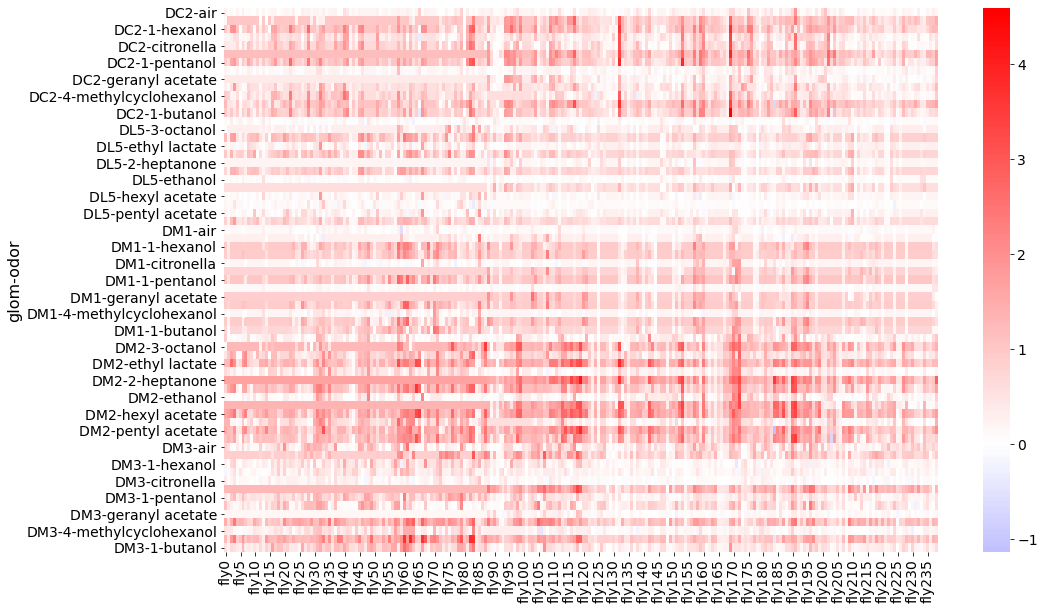

In [19]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_MAC_PN_responses, cmap='bwr', center=0, ax=ax)
plt.show()

In [20]:
fly_responses_df_MAC = df_MAC_PN_responses.loc[(gNames, oNames), :]
fly_responses_MAC = fly_responses_df_MAC.T.values

pca_MAC = PCA()
pca_MAC.fit(fly_responses_MAC)

pca_scores_MAC = pca_MAC.transform(fly_responses_MAC)
pca_loadings_MAC = pca_MAC.components_.T

pca_var_explained_MAC = pca_MAC.explained_variance_ratio_

In [21]:
fly_responses_df_MAC.shape

(65, 239)

In [22]:
pca_loadings_df_MAC = pd.DataFrame(pca_loadings_MAC, 
                                   index=fly_responses_df_MAC.index, 
                                   columns=[f'PC{i+1} ({int(100*pca_var_explained_MAC[i])}%)' for i in range(pca_loadings_MAC.shape[1])])

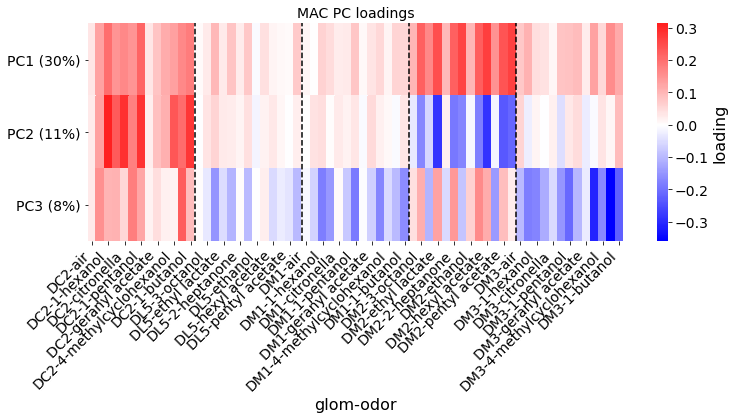

In [23]:
plt.figure(figsize=(12,4))
sns.heatmap(pca_loadings_df_MAC.iloc[:, :3].T, cmap='bwr', center=0, cbar_kws={'label': 'loading'})
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(13, 65, 13):
    plt.axvline(i, ls='--', c='k')
plt.title('MAC PC loadings')
plt.show()

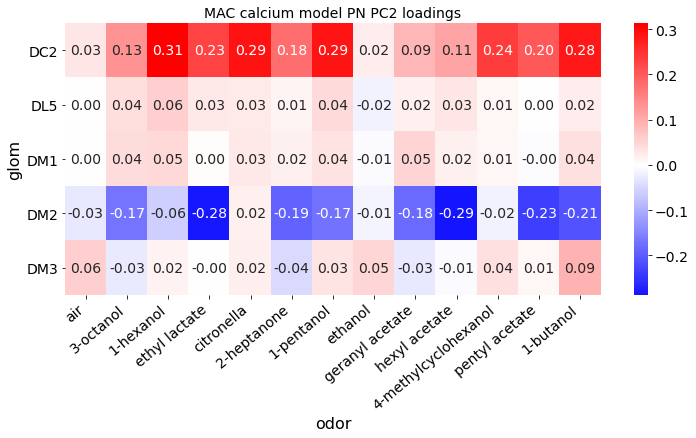

In [24]:
plt.figure(figsize=(12,5))
sns.heatmap(pd.DataFrame(pca_loadings_df_MAC.iloc[:, 1])
            .reset_index().pivot('glom', 'odor', 'PC2 (11%)')
            .loc[gNames, oNames],
            annot=True, fmt='.2f', center=0, cmap='bwr')
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('MAC calcium model PN PC2 loadings')
plt.show()

Apples to apples comparison using the 11 odors in the simulation:

In [25]:
fly_responses_df_MAC = df_MAC_PN_responses.loc[(gNames, sim_odors), :]
fly_responses_MAC = fly_responses_df_MAC.T.values

pca_MAC = PCA()
pca_MAC.fit(fly_responses_MAC)

pca_scores_MAC = pca_MAC.transform(fly_responses_MAC)
pca_loadings_MAC = pca_MAC.components_.T

pca_var_explained_MAC = pca_MAC.explained_variance_ratio_

In [26]:
fly_responses_df_MAC.shape

(55, 239)

In [27]:
pca_loadings_df_MAC = pd.DataFrame(pca_loadings_MAC, 
                                   index=fly_responses_df_MAC.index, 
                                   columns=[f'PC{i+1} ({int(100*pca_var_explained_MAC[i])}%)' for i in range(pca_loadings_MAC.shape[1])])

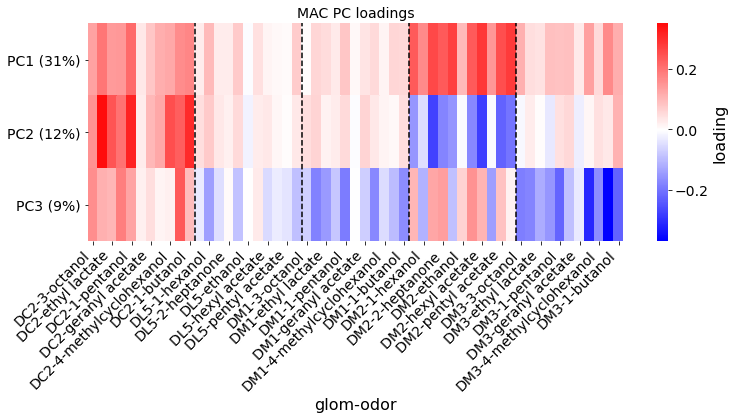

In [28]:
plt.figure(figsize=(12,4))
sns.heatmap(pca_loadings_df_MAC.iloc[:, :3].T, cmap='bwr', center=0, cbar_kws={'label': 'loading'})
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 55, 11):
    plt.axvline(i, ls='--', c='k')
plt.title('MAC PC loadings')
plt.show()

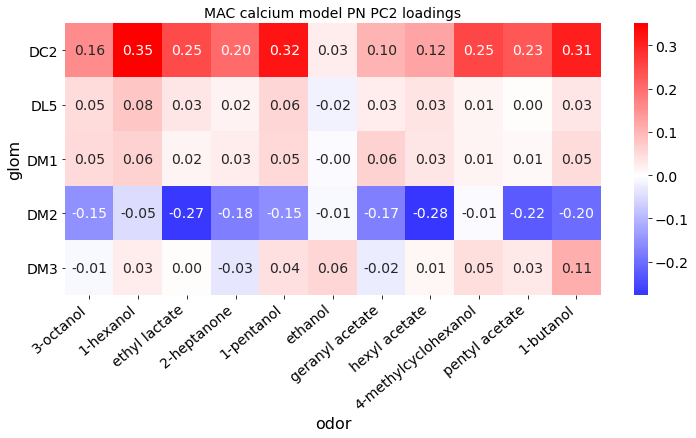

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(pd.DataFrame(pca_loadings_df_MAC.iloc[:, 1])
            .reset_index().pivot('glom', 'odor', 'PC2 (12%)')
            .loc[gNames, sim_odors],
            annot=True, fmt='.2f', center=0, cmap='bwr')
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('MAC calcium model PN PC2 loadings')
plt.show()

## Simulation ORN+LN+PN resampling responses

In [30]:
df_sim_resample_responses_nosubpre = list_of_df_responses_resamples_nosubpre[-1]
df_sim_resample_responses_subpre = list_of_df_responses_resamples_subpre[-1]

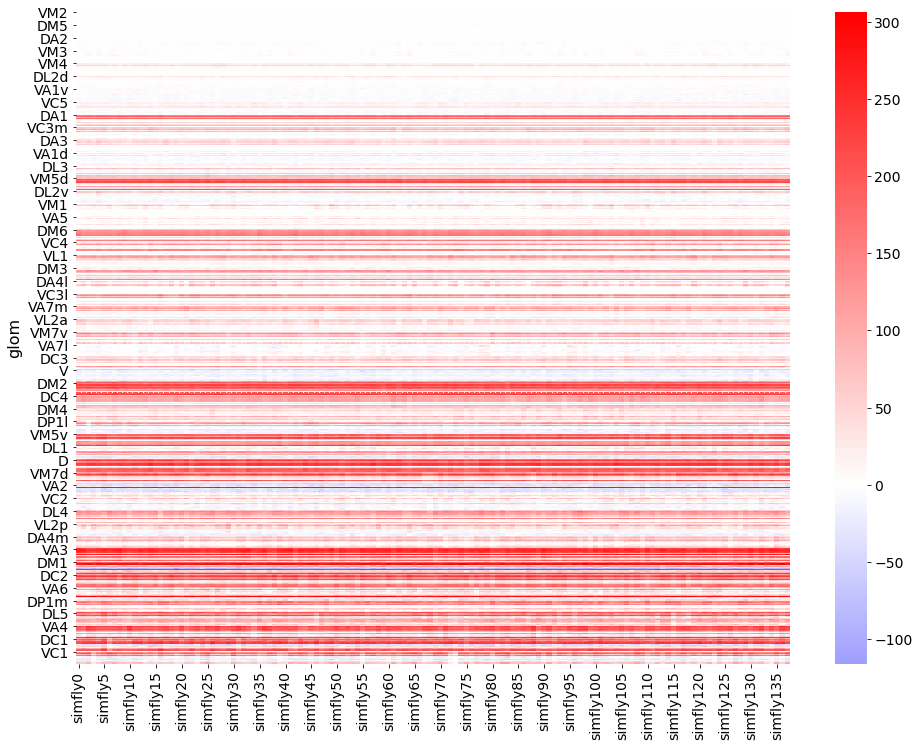

In [31]:
plot_df = df_sim_resample_responses_subpre
fly_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
gloms_sorted = (plot_df.std(1)).groupby('glom').mean().sort_values().index.values

plt.figure(figsize=(16,12))
sns.heatmap(plot_df.loc[gloms_sorted], xticklabels=5, yticklabels=11, cmap='bwr', center=0)
plt.show()

In [32]:
df_neur_ids[(df_neur_ids.altype == 'uPN') & (df_neur_ids.glom == 'DM4')]

,bodyId,type,instance,altype,glom,polarity
2815,604031203,DM4_vPN,DM4_vPN_R,uPN,DM4,-1.0
2816,542652506,DM4_vPN,DM4_vPN_R,uPN,DM4,-1.0
2817,573333835,DM4_adPN,DM4_adPN_R,uPN,DM4,1.0


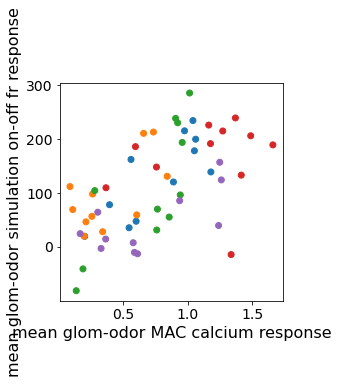

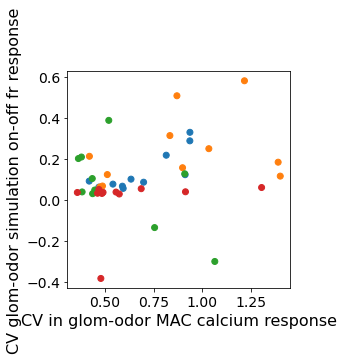

In [33]:
sim_response_means = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :].mean(1)
MAC_response_means = df_MAC_PN_responses.loc[(gNames, sim_odors), :].mean(1)

glom_colors = {gNames[i]:f'C{i}' for i in range(len(gNames))}
scatter_colors = [glom_colors[g] for g in MAC_response_means.reset_index()['glom']]

plt.figure(figsize=(4,4))
plt.scatter(MAC_response_means, sim_response_means, c=scatter_colors)
plt.xlabel('mean glom-odor MAC calcium response')
plt.ylabel('mean glom-odor simulation on-off fr response')
plt.show()


sim_response_stds = df_sim_resample_responses_subpre.loc[(gNames[:-1], sim_odors), :].std(1)
MAC_response_stds = df_MAC_PN_responses.loc[(gNames[:-1], sim_odors), :].std(1)

sim_response_CVs = sim_response_stds / sim_response_means.loc[(gNames[:-1], sim_odors)]
MAC_response_CVs = MAC_response_stds / MAC_response_means.loc[(gNames[:-1], sim_odors)]
scatter_colors = [glom_colors[g] for g in MAC_response_CVs.reset_index()['glom']]

plt.figure(figsize=(4,4))
plt.scatter(MAC_response_CVs, sim_response_CVs, c=scatter_colors)
plt.xlabel('CV in glom-odor MAC calcium response')
plt.ylabel('CV glom-odor simulation on-off fr response')
plt.show()

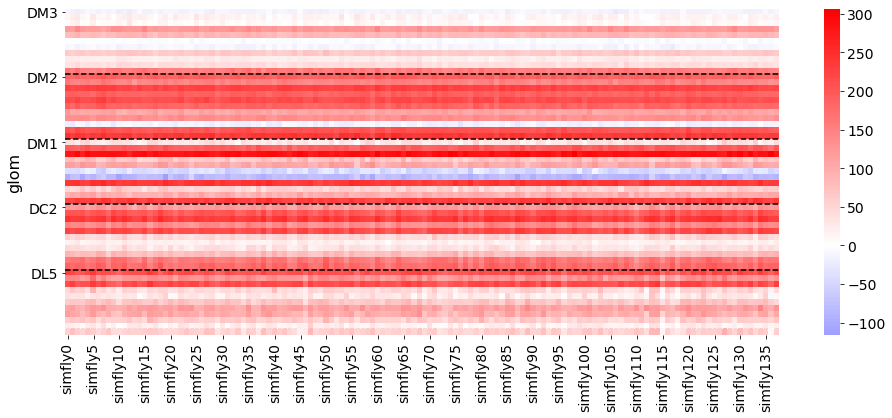

In [34]:
plot_df = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]
fly_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
gloms_sorted = (plot_df.std(1)).groupby('glom').mean().sort_values().index.values

plt.figure(figsize=(16,6))
sns.heatmap(plot_df.loc[gloms_sorted], xticklabels=5, yticklabels=11, cmap='bwr', center=0)
plt.yticks(rotation=0)
for i in np.arange(11, 55, 11):
    plt.axhline(i, ls='--', c='k') 
plt.show()

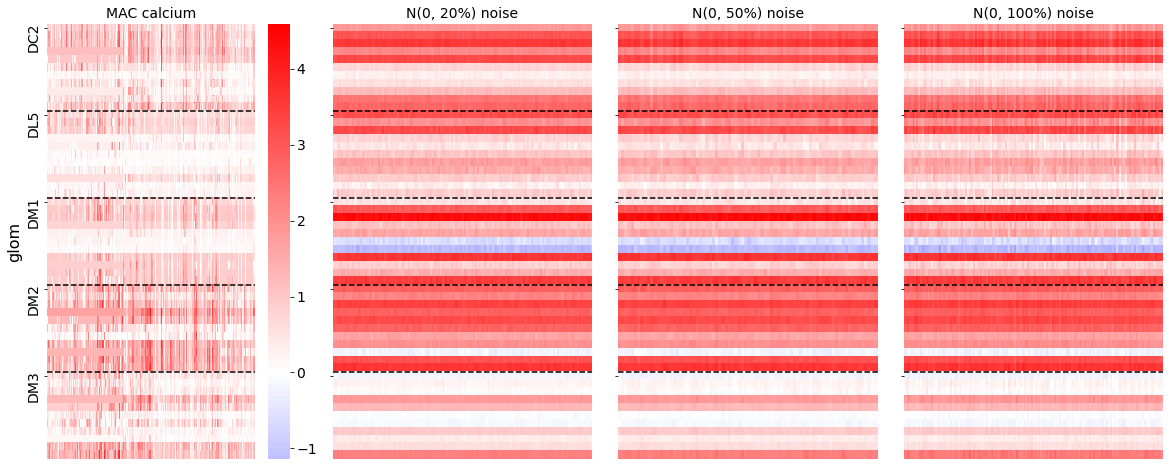

In [35]:
which_resample_sets = [ 4, 5, 6]
nplots = 1 + len(which_resample_sets)
fig, axs = plt.subplots(1, nplots, figsize=(nplots*5,8), sharey=True)

# plot MAC
plot_df = df_MAC_PN_responses.loc[(gNames, sim_odors), :]
fly_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
cols_sorted = plot_df.sum(0).sort_values().index.values[::-1]
sns.heatmap(plot_df,#.loc[:, cols_sorted], 
            xticklabels=5, yticklabels=11, cmap='bwr', center=0, ax=axs[0])

# plot sim
for i in range(len(which_resample_sets)):
    ri = which_resample_sets[i]
    ax_i = i+1
    
    resample_name = set_names[ri]
    cur_title = f'{resample_name}'
    
    df_sim_resample_responses_subpre = list_of_df_responses_resamples_subpre[ri]
    plot_df = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]
    fly_columns = plot_df.columns
    plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
    cols_sorted = plot_df.sum(0).sort_values().index.values[::-1]
    
    sns.heatmap(plot_df,#.loc[:, cols_sorted], 
                xticklabels=5, yticklabels=11, 
                vmin=-150, vmax=300, cbar=False, cmap='bwr', center=0, ax=axs[ax_i])
    axs[ax_i].set_title(cur_title)
    axs[ax_i].set_ylabel('')

axs[0].set_title('MAC calcium'); #axs[0].set_xlabel('real flies')
#axs[1].set_title('simulation , PN inputs adjusted by glomerular synapses, ON-OFF odor firing rates')
#axs[1].set_xlabel('simulated flies')

for ax in axs:
    for i in np.arange(11, 55, 11):
        ax.axhline(i, ls='--', c='k') 
    ax.set_xticks([])
plt.subplots_adjust(wspace=0.1)
plt.show()

In [36]:
gNames

['DC2', 'DL5', 'DM1', 'DM2', 'DM3']

In [37]:
save_tables = False
if save_tables:
    #df_MAC_responses.to_csv('MAC_fly_responses.csv')
    df_MAC_responses.loc[(gNames, sim_odors), :].to_csv('MAC_fly_responses.csv')

    #df_sim_resample_responses_subpre.to_csv('simulated_adjusted_fly_responses.csv')
    df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :].to_csv('simulated_adjusted_fly_responses.csv')

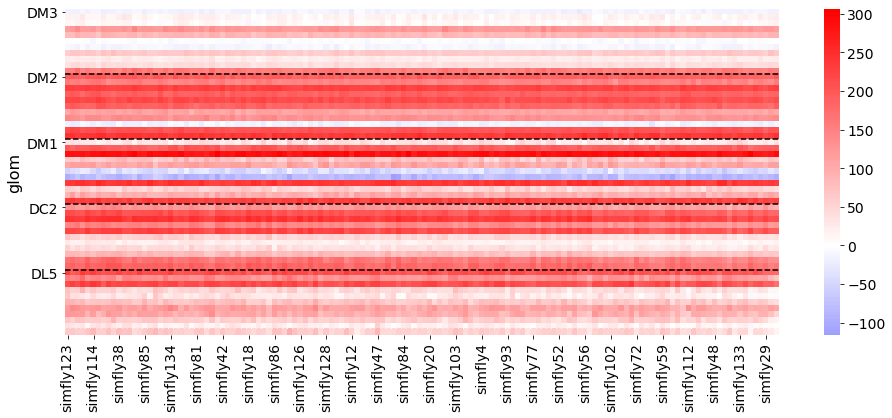

In [38]:
plot_df = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]
fly_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
gloms_sorted = (plot_df.std(1)).groupby('glom').mean().sort_values().index.values

plt.figure(figsize=(16,6))
sns.heatmap(plot_df.loc[gloms_sorted, cols_sorted], xticklabels=5, yticklabels=11, cmap='bwr', center=0)
plt.yticks(rotation=0)
for i in np.arange(11, 55, 11):
    plt.axhline(i, ls='--', c='k') 
plt.show()

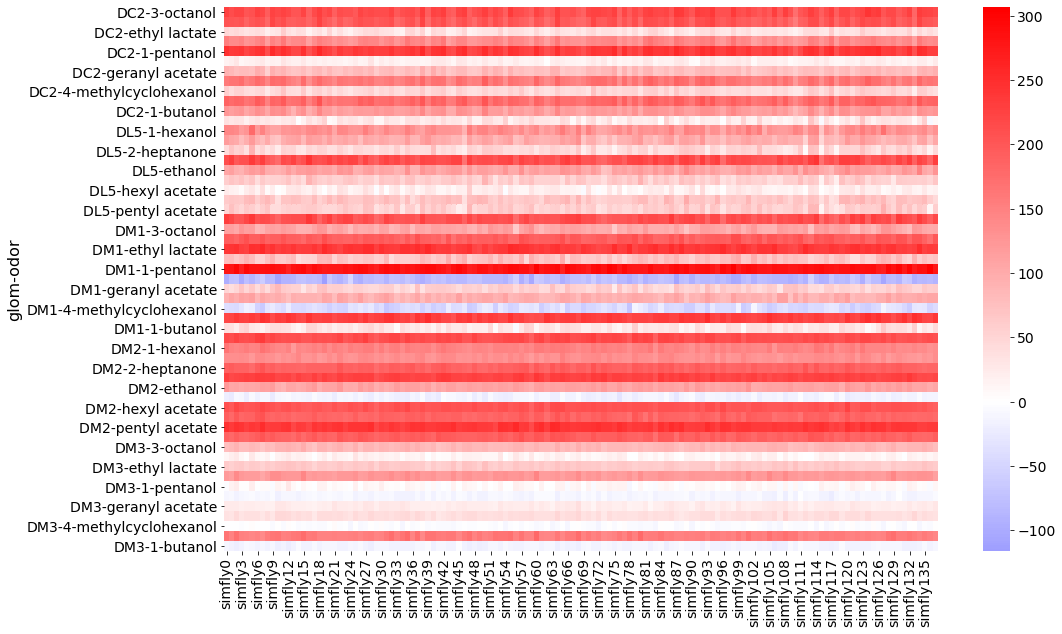

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :], cmap='bwr', center=0)
plt.show()

In [40]:
fly_responses_df_sim_allgloms = df_sim_resample_responses_subpre.loc[(hemi_gloms, sim_odors), :]
fly_responses_sim_allgloms = fly_responses_df_sim_allgloms.T.values

pca_sim_allgloms = PCA()
pca_sim_allgloms.fit(fly_responses_sim_allgloms)

pca_scores_sim_allgloms = pca_sim_allgloms.transform(fly_responses_sim_allgloms)
pca_loadings_sim_allgloms = pca_sim_allgloms.components_.T

pca_var_explained_sim_allgloms = pca_sim_allgloms.explained_variance_ratio_

In [41]:
fly_responses_df_sim_macgloms = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]
fly_responses_sim_macgloms = fly_responses_df_sim_macgloms.T.values

pca_sim_macgloms = PCA()
pca_sim_macgloms.fit(fly_responses_sim_macgloms)

pca_scores_sim_macgloms = pca_sim_macgloms.transform(fly_responses_sim_macgloms)
pca_loadings_sim_macgloms = pca_sim_macgloms.components_.T

pca_var_explained_sim_macgloms = pca_sim_macgloms.explained_variance_ratio_

In [42]:
pca_loadings_df_sim_allgloms = pd.DataFrame(pca_loadings_sim_allgloms, 
                                   index=fly_responses_df_sim_allgloms.index, 
                                   columns=[f'PC{i+1} ({int(100*pca_var_explained_sim_allgloms[i])}%)' for i in range(pca_loadings_sim_allgloms.shape[1])])
pca_loadings_df_sim_macgloms = pd.DataFrame(pca_loadings_sim_macgloms, 
                                   index=fly_responses_df_sim_macgloms.index, 
                                   columns=[f'PC{i+1} ({int(100*pca_var_explained_sim_macgloms[i])}%)' for i in range(pca_loadings_sim_macgloms.shape[1])])

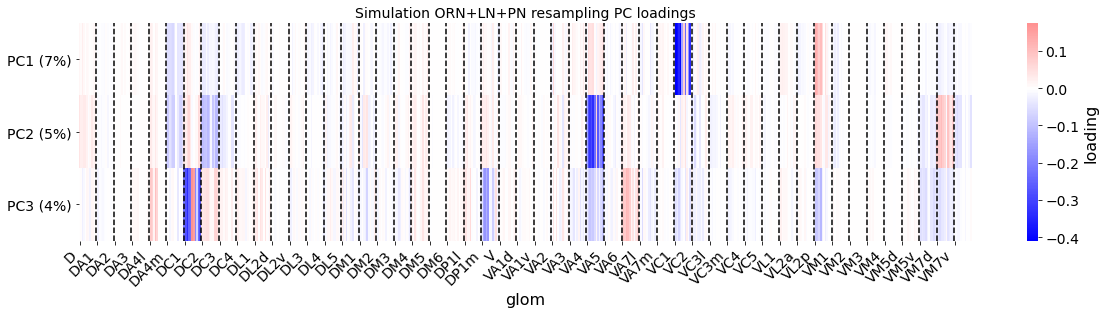

In [43]:
plot_df = pca_loadings_df_sim_allgloms
pc_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom')[pc_columns]

plt.figure(figsize=(20,4))
sns.heatmap(plot_df.iloc[:, :3].T, cmap='bwr', xticklabels=11, center=0, cbar_kws={'label': 'loading'})
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 51*11, 11):
    plt.axvline(i, ls='--', c='k')
plt.title('Simulation ORN+LN+PN resampling PC loadings')
plt.show()

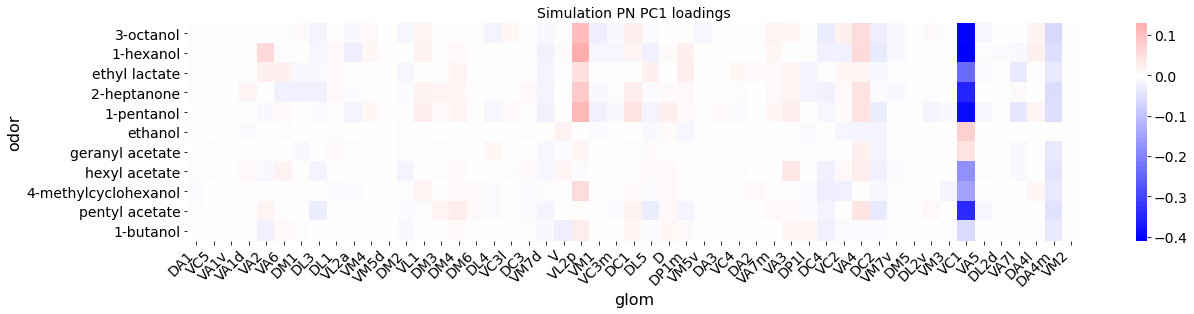

In [44]:
plt.figure(figsize=(20,4))
sns.heatmap(pd.DataFrame(pca_loadings_df_sim_allgloms.iloc[:, 0])
            .reset_index().pivot('glom', 'odor', 'PC1 (7%)')
            .loc[hemi_gloms, sim_odors].T,
            annot=False, fmt='.2f', xticklabels=1, center=0, cmap='bwr')
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
plt.title('Simulation PN PC1 loadings')
plt.show()

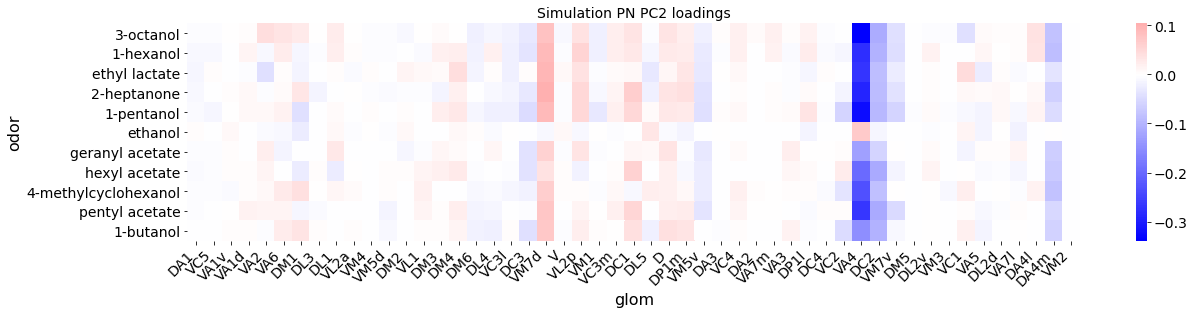

In [45]:
plt.figure(figsize=(20,4))
sns.heatmap(pd.DataFrame(pca_loadings_df_sim_allgloms.iloc[:, 1])
            .reset_index().pivot('glom', 'odor', 'PC2 (5%)')
            .loc[hemi_gloms, sim_odors].T,
            annot=False, fmt='.2f', xticklabels=1, center=0, cmap='bwr')
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
plt.title('Simulation PN PC2 loadings')
plt.show()

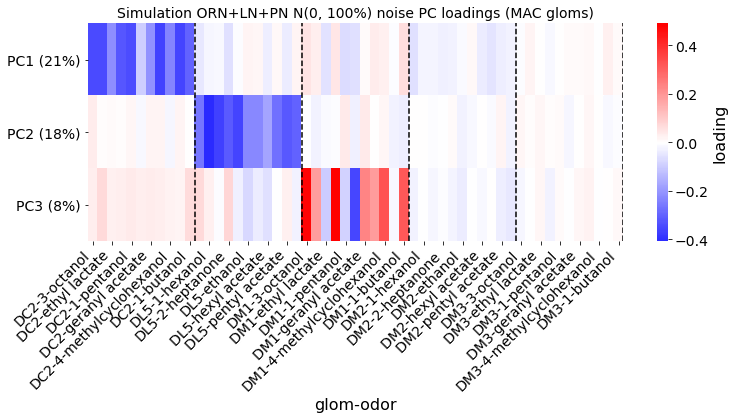

In [46]:
plt.figure(figsize=(12,4))
sns.heatmap(pca_loadings_df_sim_macgloms.iloc[:, :3].T, cmap='bwr', center=0, cbar_kws={'label': 'loading'})
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 51*11, 11):
    plt.axvline(i, ls='--', c='k')
plt.title('Simulation ORN+LN+PN N(0, 100%) noise PC loadings (MAC gloms)')
plt.show()

In [47]:
glom_colors

{'DC2': 'C0', 'DL5': 'C1', 'DM1': 'C2', 'DM2': 'C3', 'DM3': 'C4'}

In [48]:
pca_loadings_df_MAC.reset_index()['glom'].drop_duplicates()

0     DC2
11    DL5
22    DM1
33    DM2
44    DM3
Name: glom, dtype: object

In [49]:
gNames

['DC2', 'DL5', 'DM1', 'DM2', 'DM3']

In [50]:
from matplotlib.lines import Line2D

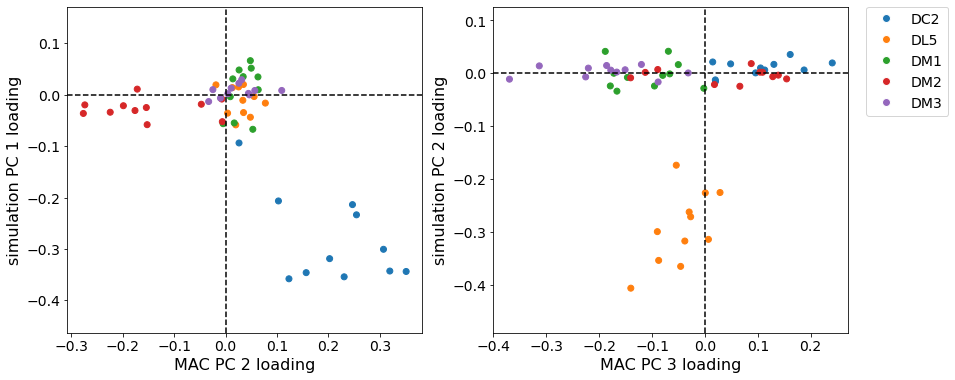

In [51]:
g_cols = [glom_colors[g] for g in pca_loadings_df_MAC.reset_index()['glom']]
fig, axs = plt.subplots(1, 2, figsize=(14,6))

mac_is = [1, 2]

axs[0].scatter(pca_loadings_df_MAC.iloc[:, mac_is[0]], pca_loadings_df_sim_macgloms.iloc[:, mac_is[0]-1],
            c=g_cols)
axs[1].scatter(pca_loadings_df_MAC.iloc[:, mac_is[1]], pca_loadings_df_sim_macgloms.iloc[:, mac_is[1]-1],
            c=g_cols)
for ax in axs:
    ax.axis('equal')
    ax.axvline(0, c='k', ls='--'); ax.axhline(0, c='k', ls='--')
    
leg_elems = [Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=glom_colors[g], label=g) for g in gNames]
axs[1].legend(handles=leg_elems, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

for i in range(2):
    axs[i].set_xlabel(f'MAC PC {mac_is[i]+1} loading')
    axs[i].set_ylabel(f'simulation PC {mac_is[i]} loading')
plt.show()

In [52]:
from scipy.stats import pearsonr

In [53]:
pearsonr(pca_loadings_df_MAC.iloc[:, mac_is[0]], pca_loadings_df_sim_macgloms.iloc[:, mac_is[0]-1])

(-0.638944899471242, 1.5245622471031888e-07)

In [54]:
pearsonr(pca_loadings_df_MAC.iloc[:, mac_is[1]], pca_loadings_df_sim_macgloms.iloc[:, mac_is[1]-1])

(0.05377218210277987, 0.6966046942947395)

In [55]:
pcis = 55
rs_mac_sim = []
for pci in range(1, pcis):
    cur_r = pearsonr(pca_loadings_df_MAC.iloc[:, pci], 
                     pca_loadings_df_sim_macgloms.iloc[:, pci-1])[0]
    rs_mac_sim.append(cur_r)
rs_mac_sim = np.array(rs_mac_sim)

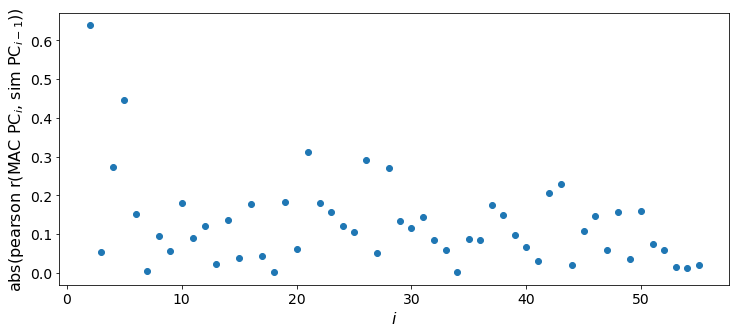

In [56]:
plt.figure(figsize=(12,5))
plt.plot(2+np.arange(len(rs_mac_sim)), np.abs(rs_mac_sim), 'o')
plt.ylabel(r'abs(pearson r(MAC PC$_i$, sim PC$_{i-1}$))')
plt.xlabel(r'$i$')
plt.show()

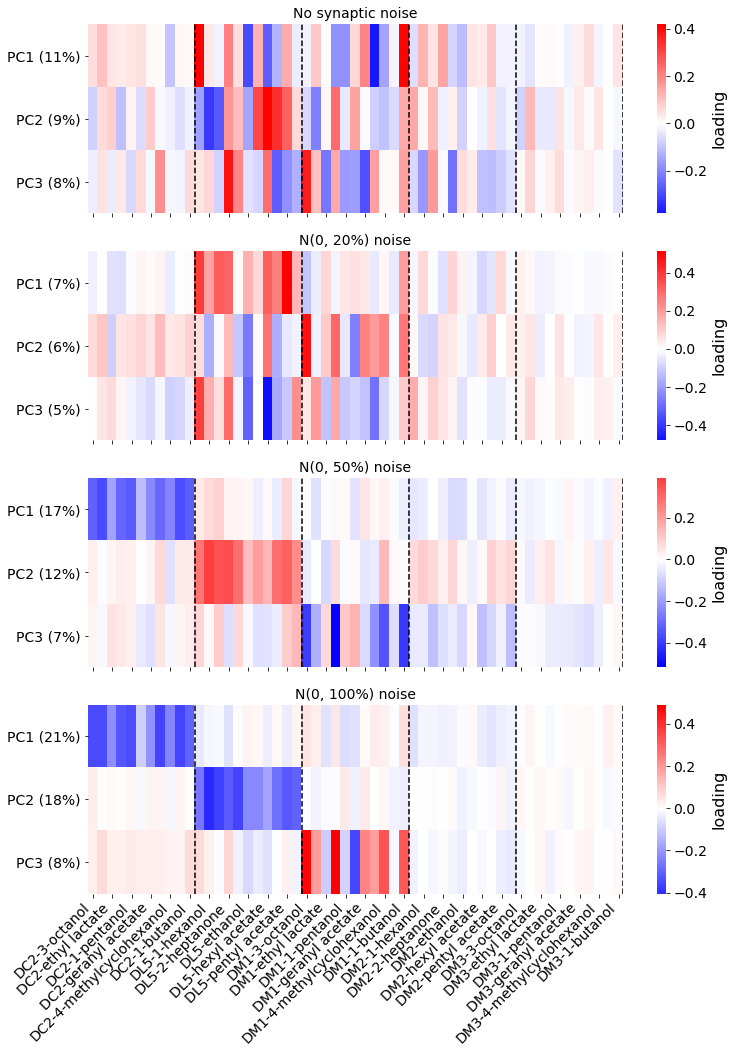

In [57]:
which_resample_sets = [0, 4, 5, 6]
nplots = len(which_resample_sets)

all_pca_loadings = {}
all_pca_vars_explained = {}

fig, axs = plt.subplots(nplots, 1, sharex=True, figsize=(12, nplots*4))

rs_plots = {}
for i in range(len(which_resample_sets)):
    ri = which_resample_sets[i]
    ax_i = i
    
    resample_name = set_names[ri]
    cur_title = f'{resample_name}'
    
    df_sim_resample_responses_subpre = list_of_df_responses_resamples_subpre[ri]
    
    ## do PCA   
    fly_responses_df_sim_macgloms = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]
    fly_responses_sim_macgloms = fly_responses_df_sim_macgloms.T.values

    pca_sim_macgloms = PCA()
    pca_sim_macgloms.fit(fly_responses_sim_macgloms)

    pca_scores_sim_macgloms = pca_sim_macgloms.transform(fly_responses_sim_macgloms)
    pca_loadings_sim_macgloms = pca_sim_macgloms.components_.T

    pca_var_explained_sim_macgloms = pca_sim_macgloms.explained_variance_ratio_
    
    
    pca_loadings_df_sim_macgloms = pd.DataFrame(pca_loadings_sim_macgloms, 
                                   index=fly_responses_df_sim_macgloms.index, 
                                   columns=[f'PC{i+1} ({int(100*pca_var_explained_sim_macgloms[i])}%)' for i in range(pca_loadings_sim_macgloms.shape[1])])
      
    all_pca_loadings[resample_name] = pca_loadings_df_sim_macgloms
    all_pca_vars_explained[resample_name] = pca_var_explained_sim_macgloms
    
    sns.heatmap(pca_loadings_df_sim_macgloms.iloc[:, :3].T, 
                cmap='bwr', center=0, cbar_kws={'label': 'loading'},
                ax=axs[ax_i])
    for i in np.arange(11, 51*11, 11):
        axs[ax_i].axvline(i, ls='--', c='k')
    axs[ax_i].set_title(f'{cur_title}')#' (PN inputs adjusted by glomerular synapses) \n PC loadings (MAC gloms)')
    axs[ax_i].set_xlabel('')
    #plt.show()
    
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
set_names

['No synaptic noise',
 '+ ORN N(0, 20%) noise',
 '+ LN N(0, 20%) noise',
 '+ PN N(0, 20%) noise',
 'N(0, 20%) noise',
 'N(0, 50%) noise',
 'N(0, 100%) noise']

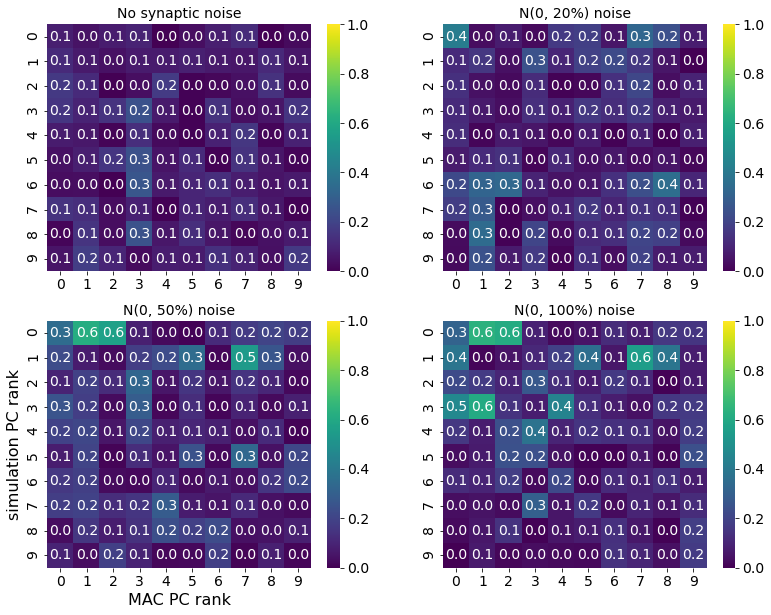

In [59]:
conds = ['No synaptic noise', 
         'N(0, 20%) noise',
         'N(0, 50%) noise',
         'N(0, 100%) noise']

nplot = 10
nconds = len(conds)

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

d_cond_grids = {}
for ic in range(nconds):
    
    # set axis
    row_i = ic // 2
    row_j = ic % 2
    cur_ax = axs[row_i, row_j]
    
    # get grid
    cond = conds[ic]
    pca_loadings = all_pca_loadings[cond]
    rs_grid = np.zeros((nplot, nplot))
    for i in range(nplot):
        for j in range(nplot):
            rs_grid[i, j] = np.abs(pearsonr(pca_loadings.iloc[:, i],
                                     pca_loadings_df_MAC.iloc[:, j])[0])
            
            
    sns.heatmap(rs_grid, vmin=0, vmax=1, cmap='viridis', fmt='.1f', annot=True, ax=cur_ax)
    cur_ax.set_title(cond)

    
    row_labs = [f'sim_PC_{i+1}' for i in range(nplot)]
    col_labs = [f'MAC_PC_{i+1}' for i in range(nplot)]
    d_cond_grids[cond] = pd.DataFrame(rs_grid, index=row_labs, columns=col_labs)
    d_cond_grids[cond+'_var_explained'] = all_pca_vars_explained[cond]
    
#axs[-1, -1].axis('off')
axs[-1, 0].set_xlabel('MAC PC rank')
axs[-1, 0].set_ylabel('simulation PC rank')
plt.show()

pickle.dump(d_cond_grids, open('sim_MAC_PCA_synapse_noise.p', 'wb'))

(array([  1.,   1.,   3.,   1.,   5.,   2.,   9.,  10.,  27.,  20.,  35.,
         56.,  61., 104.,  96., 147., 205., 252., 320., 342., 323., 253.,
        202., 132., 115.,  86.,  57.,  59.,  28.,  26.,  15.,  10.,   9.,
          1.,   1.,   5.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.56341161, -0.53426027, -0.50510893, -0.47595759, -0.44680625,
        -0.4176549 , -0.38850356, -0.35935222, -0.33020088, -0.30104954,
        -0.2718982 , -0.24274686, -0.21359552, -0.18444417, -0.15529283,
        -0.12614149, -0.09699015, -0.06783881, -0.03868747, -0.00953613,
         0.01961521,  0.04876656,  0.0779179 ,  0.10706924,  0.13622058,
         0.16537192,  0.19452326,  0.2236746 ,  0.25282594,  0.28197728,
         0.31112863,  0.34027997,  0.36943131,  0.39858265,  0.42773399,
         0.45688533,  0.48603667,  0.51518801,  0.54433936,  0.5734907 ,
         0.60264204,  0.63179338,  0.66094472,  0.69009606,  0.7192474 ,
 

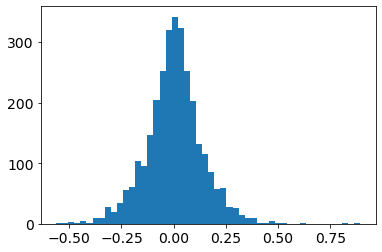

In [60]:
plt.hist(pca_loadings_df_MAC.values.flatten(), bins=50)

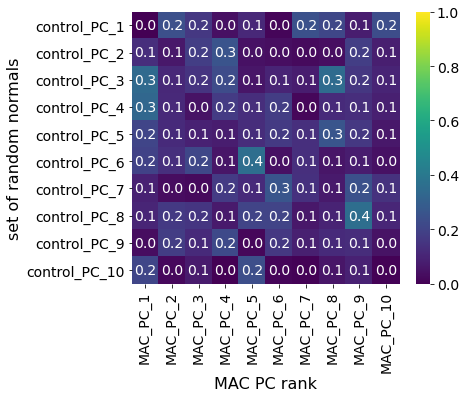

In [61]:
df_RANDOM_NORMAL_loadings = pca_loadings_df_MAC.copy()
np.random.seed(124)
df_RANDOM_NORMAL_loadings.loc[:, :] = np.random.normal(0, 0.1, df_RANDOM_NORMAL_loadings.shape)

nplot =10
rs_grid = np.zeros((nplot, nplot))
for i in range(nplot):
    for j in range(nplot):
        rs_grid[i, j] = np.abs(pearsonr(df_RANDOM_NORMAL_loadings.iloc[:, i],
                                 pca_loadings_df_MAC.iloc[:, j])[0])

        
row_labs = [f'control_PC_{i+1}' for i in range(nplot)]
col_labs = [f'MAC_PC_{i+1}' for i in range(nplot)]        
df_random_null_grid = pd.DataFrame(rs_grid, index=row_labs, columns=col_labs)

plt.figure(figsize=(6,5))
sns.heatmap(df_random_null_grid, vmin=0, vmax=1, cmap='viridis', fmt='.1f', annot=True)
plt.xlabel('MAC PC rank')
plt.ylabel('set of random normals')
plt.show()

In [62]:
df_SINGLE_GLOM_loadings = pd.DataFrame(index=pca_loadings_df_MAC.index)
single_names = []
for i in range(5):
    cur_glom = gNames[i]
    df_SINGLE_GLOM_loadings.loc[:, i] = 0
    df_SINGLE_GLOM_loadings.loc[(cur_glom, ), i] = 1
    single_names.append(f'+{cur_glom}')


df_DOUBLE_GLOM_loadings = pd.DataFrame(index=pca_loadings_df_MAC.index)
index_pairs = list(combinations(range(5), 2))
cur_col = 0
pair_names = []
for i_pair in index_pairs:
    glom1 = gNames[i_pair[0]]; glom2 = gNames[i_pair[1]]
    df_DOUBLE_GLOM_loadings.loc[:, cur_col] = 0
    df_DOUBLE_GLOM_loadings.loc[:, cur_col+1] = 0
    df_DOUBLE_GLOM_loadings.loc[(glom1, ), cur_col] = 1
    df_DOUBLE_GLOM_loadings.loc[(glom1, ), cur_col+1] = 1
    df_DOUBLE_GLOM_loadings.loc[(glom2, ), cur_col] = 1
    df_DOUBLE_GLOM_loadings.loc[(glom2, ), cur_col+1] = -1
    pair_names.append(f'+{glom1} +{glom2}')
    pair_names.append(f'+{glom1} -{glom2}')
    cur_col += 2

In [63]:
single_names

['+DC2', '+DL5', '+DM1', '+DM2', '+DM3']

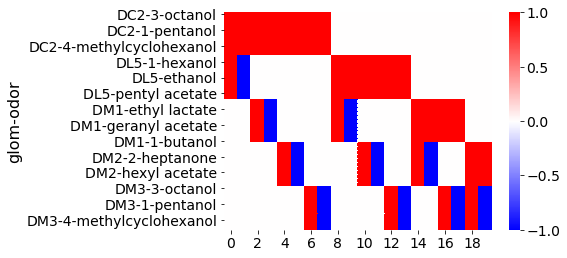

In [64]:
plt.figure()
sns.heatmap(df_DOUBLE_GLOM_loadings, cmap='bwr', center=0)
plt.show()

In [65]:
d_dfs = {'Single glomerulus control PC': df_SINGLE_GLOM_loadings,
         'Double glomerulus control PC': df_DOUBLE_GLOM_loadings}

In [66]:
rs_grid.shape

(10, 10)

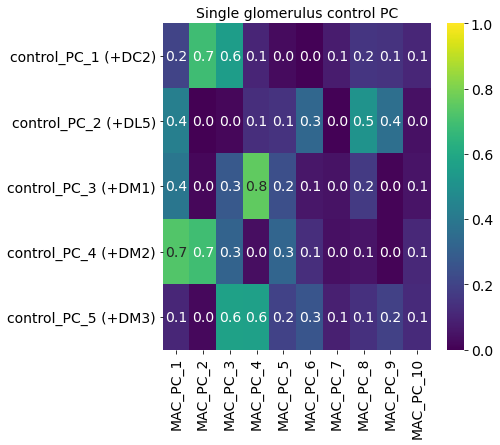

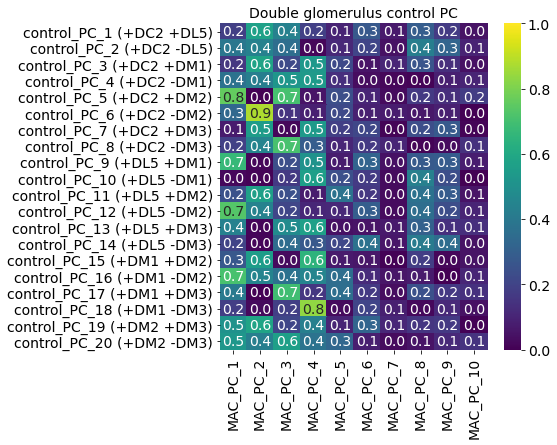

In [67]:
nplot = 10
nconds = len(conds)


d_null_grids = {}

dks = list(d_dfs.keys())
pc_names = [single_names, pair_names]
for ic in range(len(dks)):
    
    plt.figure(figsize=(6,6))
    
    # get grid
    cond = dks[ic]
    pca_loadings = d_dfs[cond]
    n_sim_pcs = pca_loadings.shape[1]
    
    rs_grid = np.zeros((n_sim_pcs, nplot))
    for i in range(n_sim_pcs):
        for j in range(nplot):
            rs_grid[i, j] = np.abs(pearsonr(pca_loadings.iloc[:, i],
                                     pca_loadings_df_MAC.iloc[:, j])[0])
                   
    row_labs = [f'control_PC_{i+1} ({pc_names[ic][i]})' for i in range(n_sim_pcs)]
    col_labs = [f'MAC_PC_{i+1}' for i in range(nplot)]        
    df_grid = pd.DataFrame(rs_grid, index=row_labs, columns=col_labs)
    
    sns.heatmap(df_grid, vmin=0, vmax=1, cmap='viridis', fmt='.1f', annot=True)
    plt.title(cond)
   
    d_null_grids[cond] = df_grid
    
    #plt.xlabel('MAC PC rank')
    #plt.ylabel('simulation PC rank')
    plt.show()

d_null_grids = {**d_null_grids, **{'Random normals control PC': df_random_null_grid}}
pickle.dump(d_null_grids, open('sim_MAC_PCA_glom_controls.p', 'wb'))

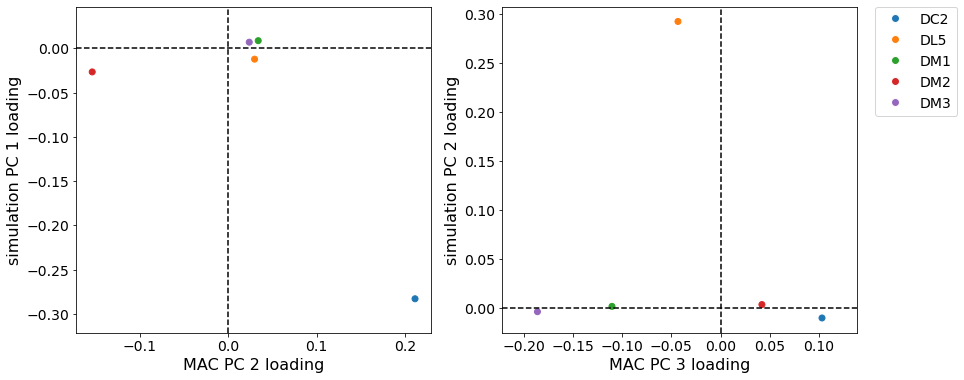

In [68]:
g_cols = [glom_colors[g] for g in pca_loadings_df_MAC.reset_index().groupby('glom').mean().reset_index()['glom']]
fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].scatter(pca_loadings_df_MAC.reset_index().groupby('glom').mean().iloc[:, 1], 
               pca_loadings_df_sim_macgloms.reset_index().groupby('glom').mean().iloc[:, 0],
            c=g_cols)
axs[1].scatter(pca_loadings_df_MAC.reset_index().groupby('glom').mean().iloc[:, 2], 
               -pca_loadings_df_sim_macgloms.reset_index().groupby('glom').mean().iloc[:, 1],
            c=g_cols)
for ax in axs:
    ax.axis('equal')
    ax.axvline(0, c='k', ls='--'); ax.axhline(0, c='k', ls='--')
    
leg_elems = [Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=glom_colors[g], label=g) for g in gNames]
axs[1].legend(handles=leg_elems, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

for i in range(2):
    axs[i].set_xlabel(f'MAC PC {i+2} loading')
    axs[i].set_ylabel(f'simulation PC {i+1} loading')
plt.show()

## multiple

IndexError: single positional indexer is out-of-bounds

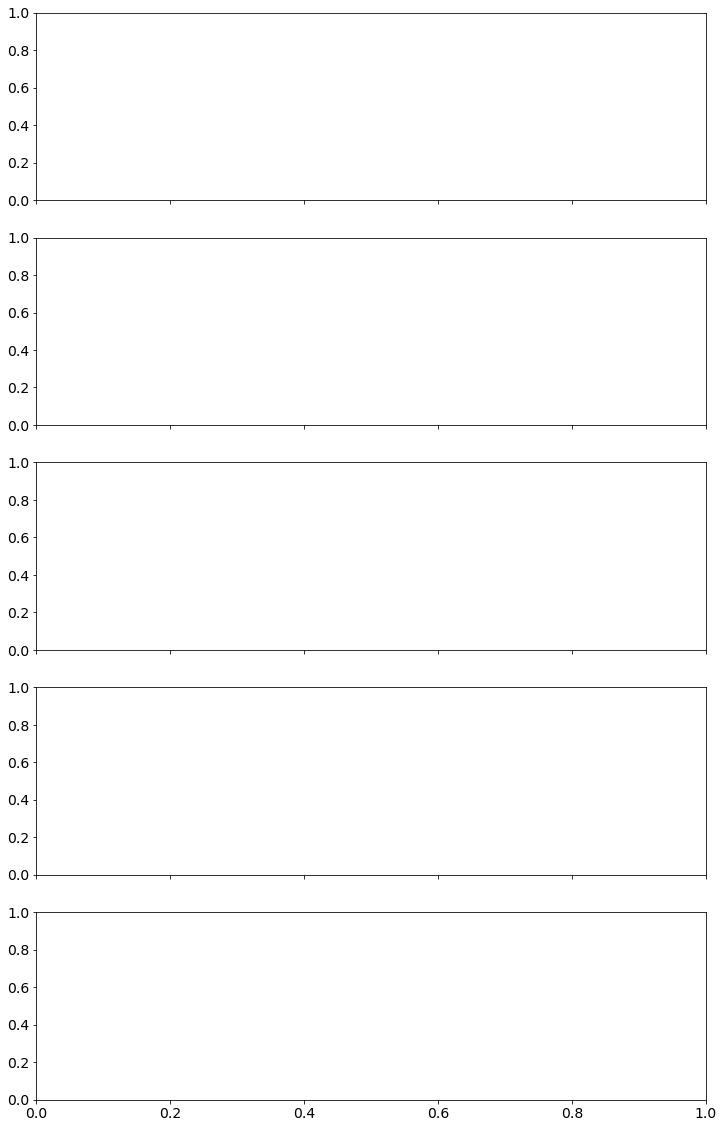

In [69]:
which_resample_sets = [0, 1, 2, 3, 4]
nplots = len(which_resample_sets)

fig, axs = plt.subplots(nplots, 1, sharex=True, figsize=(12, nplots*4))

rs_plots = {}
for i in range(len(which_resample_sets)):
    ri = which_resample_sets[i]
    ax_i = i
    
    resample_name = set_names[ri]
    cur_title = f'{resample_name}'
    
    df_sim_resample_responses_subpre = list_of_df_responses_resamples_subpre[ri]
    
    ## do PCA   
    fly_responses_df_sim_macgloms = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]
    fly_responses_sim_macgloms = fly_responses_df_sim_macgloms.T.values

    pca_sim_macgloms = PCA()
    pca_sim_macgloms.fit(fly_responses_sim_macgloms)

    pca_scores_sim_macgloms = pca_sim_macgloms.transform(fly_responses_sim_macgloms)
    pca_loadings_sim_macgloms = pca_sim_macgloms.components_.T

    pca_var_explained_sim_macgloms = pca_sim_macgloms.explained_variance_ratio_
    
    
    pca_loadings_df_sim_macgloms = pd.DataFrame(pca_loadings_sim_macgloms, 
                                   index=fly_responses_df_sim_macgloms.index, 
                                   columns=[f'PC{i+1} ({int(100*pca_var_explained_sim_macgloms[i])}%)' for i in range(pca_loadings_sim_macgloms.shape[1])])
    
    # get rs plots
    pcis = 55
    rs_mac_sim = []
    for pci in range(1, pcis):
        cur_r = pearsonr(pca_loadings_df_MAC.iloc[:, pci], 
                         pca_loadings_df_sim_macgloms.iloc[:, pci-1])[0]
        rs_mac_sim.append(cur_r)
    rs_mac_sim = np.array(rs_mac_sim)
    
    rs_plots[resample_name] = rs_mac_sim
    #plt.figure(figsize=(12,4))
    sns.heatmap(pca_loadings_df_sim_macgloms.iloc[:, :3].T, 
                cmap='bwr', center=0, cbar_kws={'label': 'loading'},
                ax=axs[ax_i])
    for i in np.arange(11, 51*11, 11):
        axs[ax_i].axvline(i, ls='--', c='k')
    axs[ax_i].set_title(f'{cur_title}')#' (PN inputs adjusted by glomerular synapses) \n PC loadings (MAC gloms)')
    axs[ax_i].set_xlabel('')
    #plt.show()
    
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
plt.figure(figsize=(13,5))
    
for key in rs_plots.keys():
    rs_mac_sim = rs_plots[key]
    plt.plot(2+np.arange(len(rs_mac_sim)), np.abs(rs_mac_sim), 'o-', label=key)
plt.ylabel(r'abs(pearson r(MAC PC$_i$, sim PC$_{i-1}$))')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.xlabel(r'$i$')
#plt.xlim(0, 25)
plt.show()

In [ ]:
rs_plots

In [ ]:
df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :]

In [ ]:
foo

## Behavior prediction

In [ ]:
sim_response_means = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :].mean(1)
MAC_response_means = df_MAC_responses.loc[(gNames, sim_odors), :].mean(1)

In [ ]:
plt.figure()
plt.hist(df_MAC_responses.loc[(gNames, sim_odors), :].values.flatten(), bins=50)
plt.xlabel('glom-odor calcium response'); plt.ylabel('# MAC flies')
plt.show()

In [ ]:
plt.figure()
plt.hist(df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :].values.flatten(), bins=50)
plt.xlabel('glom-odor firing rate response (MAC gloms)'); plt.ylabel('# simulated flies')
plt.show()

plt.figure()
plt.hist(df_sim_resample_responses_subpre.loc[(hemi_gloms, sim_odors), :].values.flatten(), bins=50)
plt.xlabel('glom-odor firing rate response (all gloms)'); plt.ylabel('# simulated flies')
plt.show()

In [ ]:
arr_sim_responses = df_sim_resample_responses_subpre.loc[(gNames, sim_odors), :].values
arr_MAC_responses = df_MAC_responses.loc[(gNames, sim_odors), :].values

arr_sim_responses_transformed = (arr_sim_responses - arr_sim_responses.mean()) / arr_sim_responses.std()
arr_sim_responses_transformed = arr_MAC_responses.std() * arr_sim_responses_transformed + arr_MAC_responses.mean()

df_sim_resample_responses_subpre_transformed = df_sim_resample_responses_subpre.copy().loc[(gNames, sim_odors), :]
df_sim_resample_responses_subpre_transformed.loc[:, :] = arr_sim_responses_transformed

In [ ]:
plt.figure()
plt.hist(df_sim_resample_responses_subpre_transformed.values.flatten(), bins=50)
plt.xlabel('transformed glom-odor firing rate response (MAC gloms)'); plt.ylabel('# simulated flies')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_MAC_responses, cmap='bwr', center=0, ax=ax)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(16,12))

# plot MAC
plot_df = df_MAC_responses.loc[(gNames, sim_odors), :]
fly_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
cols_sorted = plot_df.sum(0).sort_values().index.values[::-1]
sns.heatmap(plot_df,#.loc[:, cols_sorted], 
            xticklabels=5, yticklabels=11, cmap='bwr', center=0, ax=axs[0], vmin=-1, vmax=4)

# plot sim
plot_df = df_sim_resample_responses_subpre_transformed.loc[(gNames, sim_odors), :]
fly_columns = plot_df.columns
plot_df = plot_df.reset_index().sort_values(['glom', 'odor']).set_index('glom').loc[:, fly_columns]
cols_sorted = plot_df.sum(0).sort_values().index.values[::-1]
sns.heatmap(plot_df,#.loc[:, cols_sorted], 
            xticklabels=5, yticklabels=11, cmap='bwr', center=0, ax=axs[1], vmin=-1, vmax=4)

axs[0].set_title('MAC calcium')
axs[1].set_title('simulation +ORN+LN+PN resampling transformed calcium')

for ax in axs:
    for i in np.arange(11, 55, 11):
        ax.axhline(i, ls='--', c='k') 
    ax.set_xticks([])
    ax.set_xlabel('flies')
plt.subplots_adjust(hspace=0.2)
plt.show()

In [ ]:
sim_calcium_response_means = df_sim_resample_responses_subpre_transformed.loc[(gNames, sim_odors), :].mean(1)
MAC_response_means = df_MAC_responses.loc[(gNames, sim_odors), :].mean(1)

glom_colors = {gNames[i]:f'C{i}' for i in range(len(gNames))}
scatter_colors = [glom_colors[g] for g in MAC_response_means.reset_index()['glom']]

plt.figure(figsize=(6,6))
plt.scatter(MAC_response_means, sim_calcium_response_means, c=scatter_colors)
plt.xlabel('mean glom-odor MAC calcium response')
plt.ylabel('mean glom-odor simulation on-off fr response')
plt.show()


sim_calcium_response_stds = df_sim_resample_responses_subpre_transformed.loc[(gNames[:-1], sim_odors), :].std(1)
MAC_response_stds = df_MAC_responses.loc[(gNames[:-1], sim_odors), :].std(1)

sim_calcium_response_CVs = sim_calcium_response_stds / sim_calcium_response_means.loc[(gNames[:-1], sim_odors)]
MAC_response_CVs = MAC_response_stds / MAC_response_means.loc[(gNames[:-1], sim_odors)]
scatter_colors = [glom_colors[g] for g in MAC_response_CVs.reset_index()['glom']]

plt.figure(figsize=(6,6))
plt.scatter(MAC_response_CVs, sim_calcium_response_CVs, c=scatter_colors)
plt.xlabel('CV in glom-odor MAC calcium response')
plt.ylabel('CV glom-odor simulation on-off fr response')
plt.ylim(-0., 0.6)
plt.show()

In [ ]:
pc_loadings = pca_loadings_df_MAC.iloc[:, 1].loc[(gNames, sim_odors)]

In [ ]:
pc_loadings

In [ ]:
projections_MAC_pn_pc2 = df_MAC_responses.loc[(gNames, sim_odors), :].T.multiply(pc_loadings).sum(1)
projections_sim_pn_pc2 = df_sim_resample_responses_subpre_transformed.loc[(gNames, sim_odors), :].T.multiply(pc_loadings).sum(1)

In [ ]:
rs = [projections_MAC_pn_pc2, projections_sim_pn_pc2]

minx = np.min(np.concatenate(rs)); maxx = np.max(np.concatenate(rs))
b = np.linspace(minx, maxx, 70)
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].hist(projections_MAC_pn_pc2, bins=b)
axs[1].hist(projections_sim_pn_pc2, bins=b)
plt.xlabel('predicted OCT-MCH preference\n(projection onto MAC PN PC2)')
axs[0].set_title('MAC flies')
axs[1].set_title('simulated flies (+ORN +LN +PN resampling,\nPN synapse counts adjusted)')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
arr_sim_responses.std()

In [ ]:
fly_responses_sim_allgloms.shape, fly_responses_sim_macgloms.shape

In [ ]:
plt.figure()
plt.plot(pca_var_explained_sim_allgloms, 'o')

In [ ]:
fly_columns

In [ ]:
fly_responses_df_MAC = df_MAC_responses.loc[(gNames, odor_names), :]
fly_responses_MAC = fly_responses_df_MAC.T.values

pca_MAC = PCA()
pca_MAC.fit(fly_responses_MAC)

pca_scores_MAC = pca_MAC.transform(fly_responses_MAC)
pca_loadings_MAC = pca_MAC.components_.T


fly_responses_df_sim = df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :]
fly_responses_sim = fly_responses_df_sim.T.values

pca_sim = PCA()
pca_sim.fit(fly_responses_sim)

pca_scores_sim = pca_sim.transform(fly_responses_sim)
pca_loadings_sim = pca_sim.components_.T

In [ ]:
plt.figure()
plt.plot(1+np.arange(pca_MAC.n_components_), pca_MAC.explained_variance_ratio_, 'o', label='MAC')
plt.plot(1+np.arange(pca_sim.n_components_), pca_sim.explained_variance_ratio_, 'o', label='simulation')
plt.xlabel('PC'); plt.ylabel('fraction variance explained')
plt.legend()
plt.show()

In [ ]:
fly_responses_gloms_MAC = fly_responses_df_MAC.reset_index()['glom']
fly_responses_odors_MAC = fly_responses_df_MAC.reset_index()['odor']

fly_responses_gloms_sim = fly_responses_df_sim.reset_index()['glom']
fly_responses_odors_sim = fly_responses_df_sim.reset_index()['odor']

In [ ]:
glom_colors = {MAC_gloms[i]: f'C{i}' for i in range(len(MAC_gloms))}

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 4))
axs[0].scatter(np.arange(len(pca_loadings_MAC)), pca_loadings_MAC[:, 1], c=[glom_colors[x] for x in fly_responses_gloms_MAC])
axs[1].scatter(np.arange(len(pca_loadings_sim)), pca_loadings_sim[:, 1], c=[glom_colors[x] for x in fly_responses_gloms_sim])
plt.show()

In [ ]:
pca_loadings_df_MAC = pd.DataFrame(pca_loadings_MAC, 
                                   index=fly_responses_df_MAC.index, 
                                   columns=[f'PC{i+1}' for i in range(pca_loadings_MAC.shape[1])])

pca_loadings_df_sim = pd.DataFrame(pca_loadings_sim, 
                                   index=fly_responses_df_sim.index, 
                                   columns=[f'PC{i+1}' for i in range(pca_loadings_sim.shape[1])])

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(pca_loadings_df_MAC.iloc[:, :3].T, cmap='bwr', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 55, 11):
    plt.axvline(i, ls='--', c='k')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(pca_loadings_df_sim.iloc[:, :3].T, cmap='bwr', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=45, ha='right')
for i in np.arange(11, 55, 11):
    plt.axvline(i, ls='--', c='k')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :].mean(1),
    df_MAC_responses.loc[(gNames, odor_names), :].mean(1))
plt.xlabel('simulated fly mean (Hz)')
plt.ylabel('real fly mean (dF/F)')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df_odor_glom_responses_resampling_set.loc[(gNames[:-1], odor_names), :].std(1) / df_odor_glom_responses_resampling_set.loc[(gNames[:-1], odor_names), :].mean(1),
    df_MAC_responses.loc[(gNames[:-1], odor_names), :].std(1) / df_MAC_responses.loc[(gNames[:-1], odor_names), :].mean(1))
plt.xlabel('simulated fly CV (Hz)')
plt.ylabel('real fly CV (dF/F)')
plt.show()

In [ ]:
dfx = df_odor_glom_responses_resampling_set.loc[(gNames[:-1], odor_names), :].std(1)
dfx[dfx > 11]

In [ ]:
plt.figure()
plt.hist(df_MAC_responses.loc[(gNames, odor_names), :].values.flatten(), bins=30)
plt.show()

In [ ]:
plt.figure()
plt.hist(df_odor_glom_responses_resampling_set.loc[(gNames, odor_names), :].values.flatten(), bins=30)
plt.show()

In [ ]:
df_neur_ids[df_neur_ids.altype == 'ORN']['glom'].value_counts()

In [ ]:
from utils.plot_utils import plot_value_counts_of_series

In [ ]:
plt.figure(figsize=(18,4))
plot_value_counts_of_series(df_neur_ids[df_neur_ids.altype == 'uPN']['glom'], num_label=True)
plt.xticks(rotation=60, ha='right')
plt.ylabel('# of PNs')
plt.show()

In [ ]:
plt.figure(figsize=(18,4))
plot_value_counts_of_series(df_neur_ids[df_neur_ids.altype == 'ORN']['glom'], num_label=True)
plt.xticks(rotation=60, ha='right')
plt.ylabel('# of ORNs')
plt.show()

In [ ]:
calc_min = 0; calc_max = 1.65
        
df_sim_MAC_frs = get_sim_MAC_responses(df_AL_activity)
df_sim_MAC_frs_scaled = df_sim_MAC_frs - min(df_sim_MAC_frs.values.flatten())
df_sim_MAC_frs_scaled = df_sim_MAC_frs_scaled / 400 * calc_max

In [ ]:
mat_MAC = df_MAC_responses.loc[(gNames, odor_names), :].T.values
mat_MAC.shape

In [ ]:
plt.figure()
plt.hist(mat_MAC.flatten(), bins=30)
plt.show()

In [ ]:
xmac = mat_MAC.flatten()

In [ ]:
xmac.mean()

In [ ]:
xmac.std()

In [ ]:
xsim = df_sim_MAC_frs.values

In [ ]:
calc_transformed = ((xsim - np.mean(xsim)) / np.std(xsim)) * np.std(xmac) + np.mean(xmac)

In [ ]:
plt.hist(calc_transformed.flatten())

In [ ]:
pca = PCA()
pca.fit(mat_MAC)

SCORE = pca.transform(mat_MAC)
COEFF = pca.components_.T

In [ ]:
SCORE.shape

In [ ]:
COEFF.shape

In [ ]:
plt.plot(COEFF[:, 1], 'o')

In [ ]:
pc2_loadings = COEFF[:, 1]

In [ ]:
plt.plot(COEFF[:, 1], df_loadings.values[:, 0], 'o')

In [ ]:
mat_MAC.shape

In [ ]:
df_loadings

In [ ]:
MAC_loadings_glom_by_odor.values.flatten()

## record firing rate activity during odors

In [ ]:
df_AL_activity

In [ ]:
df_odor_glom_responses_resampling_set

In [ ]:
xx = good_set_df_sim_MAC_frs[0]

In [ ]:
dfy = pd.concat([xx.stack() for xx in good_set_df_sim_MAC_frs], 1).T

In [ ]:
dfy.values

In [ ]:
plt.hist(dfy.values.flatten(), bins=30)

In [ ]:
#df_sim_MAC_frs = sim_MAC_responses
plt.figure(figsize=(12,5))
sns.heatmap(df_sim_MAC_frs, annot=True, cmap='bwr', fmt='.0f', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('model glomerulus-mean PN firing rates (Hz)')
plt.show()

In [ ]:
#calc_min = 0; calc_max = 1.65
#df_sim_MAC_frs = sim_MAC_responses/0.4
#df_sim_MAC_frs_scaled = df_sim_MAC_frs - min(df_sim_MAC_frs.values.flatten())
#df_sim_MAC_frs_scaled = df_sim_MAC_frs_scaled / max(df_sim_MAC_frs_scaled.values.flatten()) * calc_max

plt.figure(figsize=(12,5))
sns.heatmap(df_sim_MAC_frs_scaled, annot=True, cmap='bwr', fmt='.2f', center=0)
plt.yticks(rotation=0); plt.xticks(rotation=40, ha='right')
plt.title('model glomerulus-mean PN responses scaled to match MAC calcium min/max')
plt.show()

## record connectivity matrix columns

In [ ]:
sim_orn_pos = np.where(ind_df_neur_ids.altype == 'ORN')[0]
sim_ln_pos = np.where(ind_df_neur_ids.altype == 'LN')[0]
sim_upn_pos = np.where((ind_df_neur_ids.altype == 'uPN') & ~(ind_df_neur_ids.glom.isin(thermo_hygro_glomeruli)))[0]
sim_mpn_pos = np.where(ind_df_neur_ids.altype == 'mPN')[0]

In [ ]:
orn_input_vecs_by_set = []
ln_input_vecs_by_set = []
pn_input_vecs_by_set = []
for i in range(len(list_of_bodyIds_by_set)):
    print(set_names[i])
    cur_set = list_of_bodyIds_by_set[i]
    set_orn_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_orn_pos]].sum(0).values for cur_arr in cur_set]
    orn_input_vecs_by_set.append(set_orn_input_vecs)
    set_ln_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_ln_pos]].sum(0).values for cur_arr in cur_set]
    ln_input_vecs_by_set.append(set_ln_input_vecs)
    set_pn_input_vecs = [al_block.loc[cur_arr, cur_arr[sim_upn_pos]].sum(0).values for cur_arr in cur_set]
    pn_input_vecs_by_set.append(set_pn_input_vecs)
    
orn_input_vecs_by_set = np.array(orn_input_vecs_by_set)
ln_input_vecs_by_set = np.array(ln_input_vecs_by_set)    
pn_input_vecs_by_set = np.array(pn_input_vecs_by_set)

## compute pairwise distances

In [ ]:
dist_metric = 'euclidean'

pairwise_pn_glom_by_odor_activity_dists = []
dists_to_mean_pn_glom_by_odor_activity = []
for t in list_of_pn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, nglom*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_pn_glom_by_odor_activity.append(t_dists_to_mean)
    
pairwise_pn_individ_by_odor_activity_dists = []
dists_to_mean_pn_individ_by_odor_activity = []
for t in list_of_pn_individ_tensors_good_set:
    nsim_in_t, n_pns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_pns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_pn_individ_by_odor_activity.append(t_dists_to_mean)
    
pairwise_ln_individ_by_odor_activity_dists = []
dists_to_mean_ln_individ_by_odor_activity = []
for t in list_of_ln_individ_tensors_good_set:
    nsim_in_t, n_lns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_lns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_ln_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_ln_individ_by_odor_activity.append(t_dists_to_mean)
    
pairwise_orn_glom_by_odor_activity_dists = []
dists_to_mean_orn_glom_by_odor_activity = []
for t in list_of_orn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, nglom*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_orn_glom_by_odor_activity.append(t_dists_to_mean)
    
pairwise_orn_individ_by_odor_activity_dists = []
dists_to_mean_orn_individ_by_odor_activity = []
for t in list_of_orn_individ_tensors_good_set:
    nsim_in_t, n_orns, nodors = t.shape
    t_flat = t.reshape((nsim_in_t, n_orns*nodors))
    t_pdists = pdist(t_flat, metric=dist_metric)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_orn_individ_by_odor_activity.append(t_dists_to_mean)

In [ ]:
### PAIRWISE DISTANCES OF Z SCORED DISTANCES

dist_metric = 'euclidean'

pairwise_Z_pn_glom_by_odor_activity_dists = []
dists_to_mean_Z_pn_glom_by_odor_activity = []
for t in list_of_pn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    z = t.reshape((nsim_in_t, nglom*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_pn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_pn_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_pn_individ_by_odor_activity_dists = []
dists_to_mean_Z_individ_glom_by_odor_activity = []
for t in list_of_pn_individ_tensors_good_set:
    nsim_in_t, n_pns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_pns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_pn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_individ_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_ln_individ_by_odor_activity_dists = []
dists_to_mean_Z_ln_individ_glom_by_odor_activity = []
for t in list_of_ln_individ_tensors_good_set:
    nsim_in_t, n_lns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_lns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_ln_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_ln_individ_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_orn_glom_by_odor_activity_dists = []
dists_to_mean_Z_orn_glom_by_odor_activity = []
for t in list_of_orn_glom_tensors_good_set:
    nsim_in_t, nglom, nodors = t.shape
    z = t.reshape((nsim_in_t, nglom*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_orn_glom_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_orn_glom_by_odor_activity.append(z_dists_to_mean)
    
pairwise_Z_orn_individ_by_odor_activity_dists = []
dists_to_mean_Z_orn_individ_glom_by_odor_activity = []
for t in list_of_orn_individ_tensors_good_set:
    nsim_in_t, n_orns, nodors = t.shape
    z = t.reshape((nsim_in_t, n_orns*nodors))
    z = ((z.T - z.mean(1)) / z.std(1)).T
    t_pdists = pdist(z, metric=dist_metric)
    z_mean = z.mean(0)
    z_dists_to_mean = np.sum((z - z_mean)**2, 1) ** 0.5
    pairwise_Z_orn_individ_by_odor_activity_dists.append(t_pdists)
    dists_to_mean_Z_orn_individ_glom_by_odor_activity.append(z_dists_to_mean)

In [ ]:
### PAIRWISE DISTANCES ON INPUT CONNECTIVITY

dist_metric = 'euclidean'


pairwise_pn_input_conmat_dists = []
dists_to_mean_pn_input_conmat = []
for t in pn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_pn_input_conmat_dists.append(t_pdists)
    dists_to_mean_pn_input_conmat.append(t_dists_to_mean)
    
pairwise_ln_input_conmat_dists = []
dists_to_mean_ln_input_conmat = []
for t in ln_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_ln_input_conmat_dists.append(t_pdists)
    dists_to_mean_ln_input_conmat.append(t_dists_to_mean)
    
pairwise_orn_input_conmat_dists = []
dists_to_mean_orn_input_conmat = []
for t in orn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    t_flat = np.array(t)
    t_mean = t_flat.mean(0)
    t_dists_to_mean = np.sum((t_flat - t_mean)**2, 1) ** 0.5
    pairwise_orn_input_conmat_dists.append(t_pdists)
    dists_to_mean_orn_input_conmat.append(t_dists_to_mean)

In [ ]:
t = list_of_pn_individ_tensors_good_set[0]
t.shape

In [ ]:
dist_metric = 'euclidean'

pairwise_pn_input_conmat_dists = []
for t in pn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_pn_input_conmat_dists.append(t_pdists)
    
pairwise_ln_input_conmat_dists = []
for t in ln_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_ln_input_conmat_dists.append(t_pdists)
    
pairwise_orn_input_conmat_dists = []
for t in orn_input_vecs_by_set:
    t_pdists = pdist(t, metric=dist_metric)
    pairwise_orn_input_conmat_dists.append(t_pdists)

## plot

In [ ]:
def plot_dist_hists(list_of_set_dists, set_names, xlabel, suptit = '', figname = '', dopairs=True):
      
    n_sets = len(list_of_set_dists)
    
    for l in list_of_set_dists:
        l[np.isinf(l)] = 0 # np.nan
    
    min_dist = np.min([np.nanmin(x) for x in list_of_set_dists])
    max_dist = np.max([np.nanmax(x) for x in list_of_set_dists])

    b = np.linspace(min_dist, max_dist, 80)

    cmap = cm.get_cmap('jet')

    fig, axs = plt.subplots(n_sets, 1, figsize=(10,n_sets*2), sharex=True)
    plt.suptitle(suptit, size=16)
    for i in range(len(list_of_set_dists)):
        nsims = len(list_of_set_dists[i])
        if dopairs:
            nsims = int(1/2*((8*nsims+1)**0.5 + 1))
        axs[i].hist(list_of_set_dists[i], label=set_names[i], color=cmap(i/n_sets), bins=b)
        axs[i].axvline(np.mean(list_of_set_dists[i]), ls='--', c='k')
        axs[i].set_title(set_names[i]+f' ({nsims})')
    plt.subplots_adjust(hspace=0.4)
    plt.ylabel('# simulation'+dopairs*' pair'+'s')
    plt.xlabel(xlabel)
    if len(figname) > 0:
        plt.savefig(figname, dpi=400, bbox_inches='tight')
    plt.show()

In [ ]:
plot_dist_hists(list_of_DC2_DM2_diffs_by_set, set_names, xlabel='DC2 - DM2 firing rate', dopairs=False)

In [ ]:
list_of_PN_PC2_projections_by_set[0]

In [ ]:
plot_dist_hists(list_of_PN_PC2_projections_by_set, set_names, xlabel='projection onto MAC calcium model\'s PN PC2', dopairs=False)

In [ ]:
plot_dist_hists(pairwise_pn_individ_by_odor_activity_dists,
                set_names,
                #suptit='all x0.1 eLNs x0.4 iLNs x0.75 PNs x6',
                xlabel=f'pairwise {dist_metric} distance between (PN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_pxo_activity_vecs_resample6.png'))

plot_dist_hists(dists_to_mean_pn_individ_by_odor_activity,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN x odor) coding vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_PN_pxo_activity_vec_resample6.png'))

In [ ]:
plot_dist_hists(pairwise_pn_input_conmat_dists,
                set_names,
                xlabel=f'pairwise {dist_metric} distance between PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_PN_inputs_resample6.png'))

plot_dist_hists(dists_to_mean_pn_input_conmat,
                set_names, dopairs=False,
                xlabel=f'{dist_metric} distance to mean PN input connectivity vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_conmat_PN_inputs_resample6.png'))

In [ ]:
pn_norm_set_dists = [pairwise_pn_individ_by_odor_activity_dists[i]\
           /pairwise_pn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists,
                set_names,
                xlabel=f'pairwise {dist_metric} distance between (PN x odor) activity vectors /\n'+\
                    f'pairwise {dist_metric} distance between PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_PN_activity_vecs_resample6.png'))

pn_norm_set_dists_to_mean = [dists_to_mean_pn_individ_by_odor_activity[i]\
           /dists_to_mean_pn_input_conmat[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists_to_mean,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN x odor) coding vector /\n'+\
                    f'{dist_metric} distance to mean PN input connectivity vector',
                figname=os.path.join(resampling_fig_dir,
                                     f'{dist_metric}_to_mean_input_conmat_normalized_PN_activity_vec_resample6.png'))

In [ ]:
plot_dist_hists(dists_to_mean_pn_glom_by_odor_activity,
                set_names, dopairs=False,
                xlabel=f'euclidean distance to mean (PN glom x odor) coding vector',
                )

In [ ]:
all_set_glom_tables = []
for i in range(len(list_of_sets_good_sims)):
    good_set = list_of_sets_good_sims[i]
    print(set_names[i])
    
    set_glom_tables = []
    
    rand_set = good_set
    #rand_set = np.random.choice(good_set, 5, replace=False)
    for k in rand_set:
        d_ind_sim = d_sims[k]
        df_AL_activity = d_ind_sim['df_AL_activity']
               
        df_orn_frs_onoff, df_upn_frs_onoff = make_orn_upn_frs(df_AL_activity, odor_names, df_neur_ids.reset_index(),
                                                  sub_pre=False, olf_only=True)
        df_orn_glom_by_odor_onoff, df_upn_glom_by_odor_onoff= \
                make_glomerular_odor_responses(df_orn_frs_onoff, df_upn_frs_onoff, df_AL_activity)
        
        set_glom_tables.append((df_orn_glom_by_odor_onoff, df_upn_glom_by_odor_onoff))
        
    all_set_glom_tables.append(set_glom_tables)

In [ ]:
gs = ['DM1', 'DM2', 'DC2']
g_cols = ['C1', 'C0', 'C3']

In [ ]:
import matplotlib.patches as mpatches

patches = []
for gj in range(len(gs)):
    patch = mpatches.Patch(color=g_cols[gj], label=gs[gj])
    patches.append(patch)

In [ ]:
n_sets = 5

fig, axs = plt.subplots(1, n_sets, figsize=(16,3.5), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[i]
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[i].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[i].set_title(set_names[i])
    
axs[0].set_xlabel('ORN FR (Hz)')
axs[0].set_ylabel('PN FR (Hz)')

axs[-1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

In [ ]:
which_sets = [0, 4, 5, 6]
n_sets = len(which_sets)

fig, axs = plt.subplots(1, n_sets, figsize=(5*n_sets,3.5), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[which_sets[i]]
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[i].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[i].set_title(set_names[which_sets[i]])
    
axs[0].set_xlabel('ORN FR (Hz)')
axs[0].set_ylabel('PN FR (Hz)')

axs[-1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

In [ ]:
n_sets = 8

fig, axs = plt.subplots(2, 4, figsize=(16,6), sharex=True, sharey=True)
for i in range(n_sets):
    cur_set = all_set_glom_tables[i]
    plot_row = i // 4
    plot_col = i % 4
    for run in cur_set:
        cur_glom_orn_table = run[0]
        cur_glom_pn_table = run[1]
        
        for gj in range(len(gs)):
            g = gs[gj]
            ovals = cur_glom_orn_table.loc[g, odor_names].values
            pvals = cur_glom_pn_table.loc[g, odor_names].values
            o_ordering = np.argsort(ovals)

            axs[plot_row, plot_col].plot(ovals[o_ordering], pvals[o_ordering], '-', c=g_cols[gj], alpha=0.1)
    
    axs[plot_row, plot_col].set_title(set_names[i])
    
axs[-1, 0].set_xlabel('ORN FR (Hz)')
axs[-1, 0].set_ylabel('PN FR (Hz)')

axs[-1, -1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()

In [ ]:
def plot_precell_to_pn_block_hist(ax, g, precell='ORN'):
    if precell == 'ORN':
        precell_ids = df_neur_ids[(df_neur_ids.glom == g) & (df_neur_ids.altype == 'ORN')].bodyId.values
    elif precell == 'LN':
        precell_ids = df_neur_ids[df_neur_ids.altype == 'LN'].bodyId.values
    upn_glom_ids = df_neur_ids[(df_neur_ids.glom == g) & (df_neur_ids.altype == 'uPN')].bodyId.values
    precell_to_pn_g_block = al_block.loc[precell_ids, upn_glom_ids]
    n_g_pns = precell_to_pn_g_block.shape[1]
    for igp in range(n_g_pns):
        ax.hist(precell_to_pn_g_block.iloc[:, igp], alpha=0.5, label=f'PN {igp+1}')
    return precell_to_pn_g_block

In [ ]:
gloms_to_plot = ['DM2', 'DC2', 'DM1', 'DM3']
ng_to_plot = len(gloms_to_plot)
fig, axs = plt.subplots(ng_to_plot, 1, sharex=True, figsize=(6, 3*ng_to_plot))
for i in range(ng_to_plot):
    orn_to_pn_g_block = plot_precell_to_pn_block_hist(axs[i], gloms_to_plot[i], 'ORN')
    axs[i].set_title('{}: {} ORNs, {} PNs'.format(gloms_to_plot[i], *orn_to_pn_g_block.shape))
    axs[i].legend()
axs[-1].set_xlabel('ORN to PN synapse')
plt.show()

fig, axs = plt.subplots(ng_to_plot, 1, sharex=True, figsize=(6, 3*ng_to_plot))
for i in range(ng_to_plot):
    ln_to_pn_g_block = plot_precell_to_pn_block_hist(axs[i], gloms_to_plot[i], 'LN')
    axs[i].set_title('{}: {} LNs, {} PNs'.format(gloms_to_plot[i], *ln_to_pn_g_block.shape))
    axs[i].legend()
axs[-1].set_xlabel('LN to PN synapse')
plt.show()

In [ ]:
al_block

In [ ]:
df_ln_ids = df_neur_ids[df_neur_ids.altype == 'LN']

In [ ]:
df_ln_ids.instance

In [ ]:
df_meta_ln = pd.read_csv(os.path.join(proj_dir, 'datasets/Schlegel2020/S4_hemibrain_ALLN_meta.csv'))

In [ ]:
df_ln_ids_merge = df_ln_ids.merge(df_meta_ln[['bodyid', 'anatomy.group']], left_on='bodyId', right_on='bodyid')
df_ln_ids_merge['ln_class'] = [get_LN_class(s) for s in df_ln_ids_merge['anatomy.group']]
df_ln_ids_merge

In [ ]:
df_ln_ids_merge.ln_class.value_counts()

In [ ]:
df_ln_ids_merge['anatomy.group'].value_counts()

In [ ]:
s = 'v2_LN_sparse_bil'
import re

In [ ]:
get_LN_class = lambda  s: re.findall('_LN_(\w+)_[\w+]?', s)[0]

In [ ]:
plot_dist_hists(pairwise_pn_glom_by_odor_activity_dists,
                set_names, dopairs=False,
                xlabel=f'{dist_metric} distance between PN (glom x odor) activity vectors',
                )

### plot firing rate activity vector pairwise distances

In [ ]:
plot_dist_hists(pairwise_pn_glom_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (glom x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_gxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_pn_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (individual PN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_PN_pxo_activity_vecs_resample5.png'))


plot_dist_hists(pairwise_ln_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between LN (individual LN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_LN_lxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_orn_glom_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (glom x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_ORN_gxo_activity_vecs_resample5.png'))

plot_dist_hists(pairwise_orn_individ_by_odor_activity_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (individual ORN x odor) activity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_ORN_oxo_activity_vecs_resample5.png'))

### plot input connectivity vector pairwise distances

In [ ]:
plot_dist_hists(pairwise_pn_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total PN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_PN_inputs_resample5.png'))

plot_dist_hists(pairwise_ln_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total LN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_LN_inputs_resample5.png'))

plot_dist_hists(pairwise_orn_input_conmat_dists,
                set_names,
                xlabel=f'{dist_metric} distance between total ORN input vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_conmat_ORN_inputs_resample5.png'))

## plot activity / connectivity pairwise distances

In [ ]:
pn_norm_set_dists = [pairwise_pn_individ_by_odor_activity_dists[i]\
           /pairwise_pn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(pn_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between PN (individual PN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total PN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_PN_activity_vecs_resample5.png'))

ln_norm_set_dists = [pairwise_ln_individ_by_odor_activity_dists[i]\
           /pairwise_ln_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(ln_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between LN (individual LN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total LN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_LN_activity_vecs_resample5.png'))

orn_norm_set_dists = [pairwise_orn_individ_by_odor_activity_dists[i]\
           /pairwise_orn_input_conmat_dists[i] for i in range(len(set_names))]
plot_dist_hists(orn_norm_set_dists,
                set_names,
                xlabel=f'{dist_metric} distance between ORN (individual ORN x odor) activity vectors /\n'+\
                    f'{dist_metric} distance between total ORN input connectivity vectors',
                figname=os.path.join(resampling_fig_dir,
                                     f'pairwise_{dist_metric}_between_input_conmat_normalized_ORN_activity_vecs_resample5.png'))

In [ ]:
vec = pn_norm_set_dists
which_i = [0, 1, 2, 3, 4][::-1]

labs = ['none',
        'ORNs',
        'LNs', 
        'PNs',
        'ORNs, LNs,\n and PNs'
       ][::-1]
plt.figure(figsize=(8,4))
plt.violinplot([vec[i] for i in which_i], showmeans=True, vert=False)
plt.yticks(1+np.arange(len(which_i)), labs)#, ha='right', rotation=30)
plt.ylabel('site of wiring variability')
plt.xlabel('normalized effect on PN coding variability\n(euclidean distance between PN odor codings /\n euclidean distance between PN input connectivities)')
#plt.savefig('ln_effect_fin.png', dpi=800, bbox_inches='tight')
plt.show()

In [ ]:
foo

In [ ]:
foo

In [ ]:
## identify sets in tails

In [ ]:
def get_i_j_from_pairwise_pos(pos_in_pdist, n):
    '''
    # testing
    dat = np.random.normal(0, 1, (13, 80))
    my_pdists = pdist(dat, metric=dist_metric)
    for jk in np.arange(78):
        i_order, j_order = get_i_j_from_pairwise_pos(jk, 13)
        print(my_pdists[jk] == pdist(dat[[i_order, j_order], :], metric=dist_metric)[0])
    '''
    try_pos = 0; i_order = 0; j_order = 0
    while(True):
        addition = n - 1 - i_order
        if try_pos + addition > pos_in_pdist:
            break
        else:
            try_pos += addition
            i_order += 1
    j_order = pos_in_pdist - try_pos + i_order + 1
    return i_order, j_order

In [ ]:
list_of_set_dists = [pairwise_dists[i]/pairwise_conmat_dists[i] for i in range(len(set_names))]
for l in list_of_set_dists:
    l[np.isinf(l)] = 0 # np.nan


min_dist = np.min([np.nanmin(x) for x in list_of_set_dists])
max_dist = np.max([np.nanmax(x) for x in list_of_set_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(8, 1, figsize=(10,16), sharex=True)
for i in range(len(list_of_set_dists)):
    axs[i].hist(list_of_set_dists[i], label=set_names[i], color=cmap(i/8), bins=b)
    axs[i].axvline(np.mean(list_of_set_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance between PN activity vectors /\n{dist_metric} distance between total PN input vectors')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'hist_divide_activity_distance_by_synapse_distance_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
pairwise_conmat_dists

In [ ]:
pairwise_dists

In [ ]:
from scipy import stats

In [ ]:
cmap = cm.get_cmap('jet')

reord = [0,1,2,3,7,6,4,5]

fig, axs = plt.subplots(4, 2, figsize=(12,20), sharex=True, sharey=True)
for i in range(len(set_names)):
    axs[i%4, int(i>=4)].scatter(pairwise_conmat_dists[reord[i]], pairwise_dists[reord[i]], 
                   alpha=0.1, label=set_names[reord[i]], color='k')#cmap(reord[i]/8))
    slope, intercept, r_value, p_value, std_err = stats.linregress(pairwise_conmat_dists[reord[i]], 
                                                                   pairwise_dists[reord[i]], fit_intercept=False)
    axs[i%4, int(i>=4)].set_title(set_names[reord[i]] + ', slope: {:.2f}, r: {:.2f}'.format(slope, r_value))
    
    
    
    #axs[i%4, int(i>=4)].axis('square')
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.subplots_adjust(hspace=0.4)
axs[-1][0].set_ylabel('distance between PN activity vectors')
axs[-1][0].set_xlabel('distance between PN input synapse vectors')
#plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
#plt.savefig(f'scatter_PN_activity_vs_conmat_PN_inputs_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
cmap = cm.get_cmap('jet')

for i in range(len(set_names)):
    plt.figure(figsize=(6,6))
    plt.scatter(pairwise_conmat_dists[i], pairwise_dists[i], 
                   alpha=0.6, label=set_names[i], color=cmap(i/8))
    plt.title(set_names[i])
    plt.show()
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.subplots_adjust(hspace=0.4)
#plt.ylabel('# simulation pairs')
#plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
#plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5.png', dpi=400, bbox_inches='tight')

In [ ]:

        ind_al_block = al_block.copy().loc[ind_df_bodyIds, ind_df_bodyIds]
    

In [ ]:
list_of_pn_glom_tensors_good_set[0].shape

In [ ]:
[x.shape for x in list_of_pn_glom_tensors_good_set]

In [ ]:
tensor_stds = [np.std(cur_tensor, 2) for cur_tensor in list_of_pn_glom_tensors_good_set]
tensor_means = [np.mean(cur_tensor, 2) for cur_tensor in list_of_pn_glom_tensors_good_set]
tensor_cvs = [tensor_stds[i]/tensor_means[i]for i in range(len(list_of_pn_glom_tensors_good_set))]

In [ ]:
plt.figure(figsize=(12,8))
b = np.linspace(0, 6, 100)
plt.hist(tensor_cvs[1].flatten(), label='ORN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[2].flatten(), label='LN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[3].flatten(), label='PN', alpha=0.6, bins=b)
plt.hist(tensor_cvs[0].flatten(), label='None', alpha=0.6, bins=b)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

In [ ]:
cmap = cm.get_cmap('jet')

In [ ]:
list_of_arrays = [x.flatten() for x in tensor_stds]
min_dist = np.min([np.nanmin(x) for x in list_of_arrays])
max_dist = np.max([np.nanmax(x) for x in list_of_arrays])
b = np.linspace(min_dist, max_dist, 100)

fig, axs = plt.subplots(8, 1, figsize=(8,9), sharex=True)
for i in range(8):
    axs[i].hist(list_of_arrays[i], color=cmap(i/8), bins=b)
    axs[i].set_ylabel(set_names[i], rotation=0, ha='right')
plt.show()

In [ ]:
dist_metric = 'euclidean'

pairwise_dists = []
for t in list_of_pn_glom_tensors_good_set:
    #t = t[:75, :, :]
    nsim_in_t, nglom, nodors = t.shape
    t_pdists = pdist(t.reshape((nsim_in_t, nglom*nodors)), metric=dist_metric)
    pairwise_dists.append(t_pdists)

In [ ]:
min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(8, 1, figsize=(10,16), sharex=True)
for i in range(len(list_of_pn_glom_tensors_good_set)):
    axs[i].hist(pairwise_dists[i], label=set_names[i], color=cmap(i/8), bins=b)
    axs[i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
set_names

In [ ]:
new_set_names = ['no resampling',
 'resampled ORNs',
 'resampled LNs',
 'resampled PNs',
 '+ LN + PN',
 '+ ORN + PN',
 '+ ORN + LN',
 'resampled ORNs, LNs, PNs']



min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

mini_set = [0,1,2,3,7]
nplots = len(mini_set)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(5, 1, figsize=(8,8), sharex=True)
for i_i in range(5):
    i = mini_set[i_i]
    axs[i_i].hist(pairwise_dists[i], label=new_set_names[i], color=cmap(i_i/8), bins=b)
    axs[i_i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i_i].set_title(new_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# pairs')
plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_dists_resample5_mini.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
new_set_names = ['no resampling',
 'resampled ORNs',
 'resampled LNs',
 'resampled PNs',
# '+ LN + PN',
# '+ ORN + PN',
# '+ ORN + LN',
 'resampled ORNs, LNs, PNs']



min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

mini_set = [0,1,2,3,7]
nplots = len(mini_set)

cmap = cm.get_cmap('jet')

fig, axs = plt.subplots(5, 1, figsize=(8,8), sharex=True)
for i_i in range(5):
    i = mini_set[i_i]
    axs[i_i].hist(pairwise_dists[i], label=new_set_names[i], color=cmap(i_i/8), bins=b)
    axs[i_i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i_i].set_title(new_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# pairs')
plt.xlabel(f'{dist_metric} distance')
#plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.93)
plt.savefig(f'pdists_resample5_mini.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
d_uPN_out = pickle.load(open('pairwise_dists_resample5_uPN_out.p', 'rb'))
d_LN_thermo = pickle.load(open('pairwise_dists_resample5_LN_thermo_extreme.p', 'rb'))

d_uPN_out['set_names'], d_LN_thermo['set_names']

In [ ]:
combined_pairwise_dists = pairwise_dists[:4] \
    + d_uPN_out['dists'] \
    + pairwise_dists[4:] \
    + d_LN_thermo['dists']

combined_set_names = set_names[:4] + \
    ['+ uPN; fixed uPN$\\rightarrow$ORN',
     '+ uPN; fixed uPN$\\rightarrow$LN',
     '+ uPN; fixed uPN$\\rightarrow$uPN',
     '+ uPN; fixed uPN$\\rightarrow$mPN'] + \
    set_names[4:] + \
    ['+ ORN + LN + PN; ++ sensitivity LNs', 
     '+ ORN + LN + PN; -- sensitivity LNs', ]

In [ ]:
min_dist = np.min([np.nanmin(x) for x in combined_pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in combined_pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

nplots = len(combined_pairwise_dists)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)
for i in range(nplots):
    axs[i].hist(combined_pairwise_dists[i], label=combined_set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(combined_pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(combined_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.91)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5_combined.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
len(combined_pairwise_dists)

In [ ]:
foo

In [ ]:
min_dist = np.min([np.nanmin(x) for x in combined_pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in combined_pairwise_dists])

b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')


mini_set = [0,1,2,3,4]
nplots = len(mini_set)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)

for i in mini_set:
    axs[i].hist(combined_pairwise_dists[i], label=combined_set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(combined_pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(combined_set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) mean PN firing rate vectors', y=0.91)
#plt.savefig(f'pairwise_{dist_metric}_between_vectors_resample5_combined_mini.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
all_good_sims = np.concatenate(list_of_sets_good_sims)
all_good_sims_short_names = np.concatenate([[set_names[i]]*len(list_of_sets_good_sims[i])\
                                            for i in range(len(list_of_sets_good_sims))])

In [ ]:
odor_names = ['methyl salicylate', 
    '3-methylthio-1-propanol', 
    '1-butanol',
    '2,3-butanedione',
    '4-methylphenol',
    'isopentyl acetate']

In [ ]:
all_tabs = []
for k in all_good_sims:
    d_ind_sim = d_sims[k]

    df_AL_activity = d_ind_sim['df_AL_activity']
    
    df_orn_activity = df_AL_activity.loc[df_AL_activity.neur_type == 'ORN'].set_index('neur_name')
    df_orn_frs = df_orn_activity.loc[:, (df_orn_activity.columns.str.contains('dur')) | 
                                        (df_orn_activity.columns.str.contains('glom')) ]
    df_orn_frs.columns = odor_names + ['glom']

    df_upn_activity = df_AL_activity.loc[df_AL_activity.neur_type2 == 'uPN'].set_index('neur_name')
    df_upn_frs = df_upn_activity.loc[:, (df_upn_activity.columns.str.contains('dur')) | 
                                        (df_upn_activity.columns.str.contains('glom')) ]
    df_upn_frs.columns = odor_names + ['glom']

    max_fr = max(np.max(np.max(df_orn_frs[odor_names])), np.max(np.max(df_upn_frs[odor_names])))
    
    df_orn_frs_mean_glom = df_orn_frs.groupby('glom').mean()
    gloms_sorted_by_sum_orn_fr = df_orn_frs_mean_glom.sum(1).sort_values(ascending=False).index.values
    df_orn_frs_mean_glom = df_orn_frs_mean_glom.loc[gloms_sorted_by_sum_orn_fr]
    df_orn_frs_std_glom = df_orn_frs.groupby('glom').std().loc[gloms_sorted_by_sum_orn_fr]

    df_upn_frs_mean_glom = df_upn_frs.groupby('glom').mean().loc[gloms_sorted_by_sum_orn_fr]
    df_upn_frs_std_glom = df_upn_frs.groupby('glom').std().loc[gloms_sorted_by_sum_orn_fr]

    df_orn_frs_CV_glom = df_orn_frs_std_glom / df_orn_frs_mean_glom
    df_upn_frs_CV_glom = df_upn_frs_std_glom / df_upn_frs_mean_glom
    
    all_tabs.append(df_upn_frs_mean_glom)

In [ ]:
len(all_tabs)

In [ ]:
df_ex_odor_sims = []
for i in range(len(all_good_sims)):
    sim_name = 'sim_'+all_good_sims_short_names[i][-8:]
    #ex_odor_row = all_tabs[i][ex_odor]
    ex_odor_row = pd.Series(all_tabs[i].T.values.flatten())
    ex_odor_row = (all_tabs[i]
                   .reset_index()
                   .melt('glom', 
                         var_name='odor', 
                         value_name=all_good_sims_short_names[i])
                   .sort_values('odor')
                   .set_index(['odor', 'glom'])
                  )
    ex_odor_row.name = all_good_sims_short_names[i]
    df_ex_odor_sims.append(ex_odor_row)
df_ex_odor_sims = pd.concat(df_ex_odor_sims, 1, sort=False).T

In [ ]:
gloms_ordered_by_mean_odor_FR = df_ex_odor_sims.T.reset_index().groupby('glom').mean().mean(1).sort_values(ascending=False).index.values

In [ ]:
df_ex_ordered = df_ex_odor_sims.copy().T.reset_index()
df_ex_ordered.glom = pd.Categorical(df_ex_ordered.glom, categories=gloms_ordered_by_mean_odor_FR, ordered=True)
df_ex_ordered = df_ex_ordered.sort_values(['odor', 'glom']).set_index(['odor', 'glom']).T

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_ex_ordered, vmax=max_fr,
            fmt='.0f', cmap='viridis', vmin=0, cbar_kws={'label': 'firing rate (Hz)'})
plt.title('glomerulus-average PN firing rate during {}')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered.loc[cur_set_name]
    sns.heatmap(cur_df, vmax=max_fr, ax=axs[i], cbar_ax=cbar_ax,
                cmap='viridis', vmin=0, cbar_kws={'label': 'firing rate (Hz)'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

### Vector normalization

In [ ]:
row_means = df_ex_ordered.mean(1)
row_stds = df_ex_ordered.std(1)
df_ex_ordered_rowZ = (df_ex_ordered.T - row_means).T
df_ex_ordered_rowZ = (df_ex_ordered_rowZ.T / row_stds).T

In [ ]:
(df_ex_ordered_rowZ**2).sum(1)

In [ ]:
vec = row_means

min_val = np.min(vec); max_val = np.max(vec)
b = np.linspace(min_val, max_val, 80)

cmap = cm.get_cmap('jet')

nplots = len(set_names)
fig, axs = plt.subplots(nplots, 1, figsize=(10,2*nplots), sharex=True)
for i in range(nplots):
    axs[i].hist(vec.loc[set_names[i]].values, label=set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(vec.loc[set_names[i]]), ls='--', c='k')
    axs[i].set_title(set_names[i])
    #axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulations')
plt.xlabel(f'firing rate (Hz)')
plt.suptitle('row-wise mean per resampling class', y=0.93)
plt.show()

In [ ]:
df_ex_ordered_rowZ

In [ ]:
dist_metric = 'euclidean'

pairwise_dists_from_df_ordered_rowZ = []
for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    cur_df_pdists = pdist(cur_df.values, metric=dist_metric)
    pairwise_dists_from_df_ordered_rowZ.append(cur_df_pdists)

In [ ]:
pairwise_dists = pairwise_dists_from_df_ordered_rowZ

min_dist = np.min([np.nanmin(x) for x in pairwise_dists])
max_dist = np.max([np.nanmax(x) for x in pairwise_dists])
b = np.linspace(min_dist, max_dist, 80)

cmap = cm.get_cmap('jet')

nplots = len(set_names)
fig, axs = plt.subplots(nplots, 1, figsize=(10,16), sharex=True)
for i in range(nplots):
    axs[i].hist(pairwise_dists[i], label=set_names[i], color=cmap(i/nplots), bins=b)
    axs[i].axvline(np.mean(pairwise_dists[i]), ls='--', c='k')
    axs[i].set_title(set_names[i])
plt.subplots_adjust(hspace=0.4)
plt.ylabel('# simulation pairs')
plt.xlabel(f'{dist_metric} distance')
plt.suptitle('pairwise distances between (glom x odor) Z-scored mean PN firing rate vectors', y=0.93)
plt.savefig(f'pairwise_{dist_metric}_between_vectors_rowZ_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, #vmin=-3, vmax=3,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z score'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional Z-scored mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_rowZ_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_rowZ.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, vmin=-2, vmax=2,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z score'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional Z-scored mean PN firing rate vectors, by resampling condition', y=0.91)
plt.savefig('pn_vectors_by_resampling_condition_rowZ_thresh_resample5.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
#df_gloms_num_neurs = pd.read_csv('df_gloms_num_neurs.csv', index_col=0)

In [ ]:
df_ex_ordered

In [ ]:
df_all = df_ex_ordered.copy().loc['+ PN']#.loc['+ ORN + LN + PN']
df_all_colZ = (df_all - df_all.mean(0))/df_all.std(0)

In [ ]:
df_all_colwise = df_all.std(0) / df_all.mean(0)
s_metric = 'CV PN firing rate'

In [ ]:
df_all_glom_odor_colwise = df_all_colwise.reset_index().pivot('odor', 'glom', 0)
df_all_glom_avg = df_all_glom_odor_colwise.mean(0)


plt.figure(figsize=(15,2))
sns.heatmap(df_all_glom_odor_colwise, annot=True, fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 0},
            cmap='jet', xticklabels=True)
plt.show()

plt.figure(figsize=(15,2))
sns.heatmap(pd.DataFrame(df_all_glom_avg).T, annot=True, fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 90},
            cmap='jet', xticklabels=True)
plt.show()

In [ ]:
df_all_glom_avg_num_neurs_merge = df_all_glom_avg.reset_index().merge(df_gloms_num_neurs.reset_index())

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
axs[0].plot(df_all_glom_avg_num_neurs_merge['num_orns'], df_all_glom_avg_num_neurs_merge[0], 'o')
axs[1].plot(df_all_glom_avg_num_neurs_merge['num_pns'], df_all_glom_avg_num_neurs_merge[0], 'o')
axs[0].set_xlabel('# ORNs / glom'); axs[1].set_xlabel('# PNs / glom')
axs[0].set_ylabel(s_metric)
plt.show()

In [ ]:
df_all_col_CVs = df_all.std(0)
df_all_glom_odor_CVs = df_all_col_CVs.reset_index().pivot('odor', 'glom', 0)

plt.figure(figsize=(15,2))
sns.heatmap(df_all_glom_odor_CVs, cmap='jet', xticklabels=True)
plt.show()

In [ ]:
df_all_glom_odor_CVs

In [ ]:
df_all_colZ

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df_all_colZ, cmap='bwr', center=0, xticklabels=True)
plt.xticks(fontsize=4)
plt.show()

In [ ]:
ddf = df_ex_ordered.loc['+ PN'].iloc[:, :40]
plt.figure(figsize=(12,6))
sns.heatmap(ddf, xticklabels=True, cmap='viridis',
            cbar_kws={'label': 'mean glom PN firing rate (Hz)'})
plt.yticks([])
plt.ylabel('+ PN resample')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
#plt.savefig('zoom_in_to_PNblock.png')
plt.show()

In [ ]:
ddf_colZ = (ddf - ddf.mean(0))/ddf.std(0)
plt.figure(figsize=(12,6))
sns.heatmap(ddf_colZ, cmap='bwr', center=0)
plt.show()

In [ ]:
ddf_colZ.mean(0)

In [ ]:
from utils.data_utils_hemi import df_char_ids

In [ ]:
'''
pairwise_dists_from_df_blockZ = []
for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered.loc[cur_set_name]
    cur_df_blockZ = (cur_df - cur_df.mean(0)) / cur_df.std(0)
    cur_df_blockZ_pdists = pdist(cur_df_blockZ.values, metric=dist_metric)
    pairwise_dists_from_df_blockZ.append(cur_df_blockZ_pdists)
'''

In [ ]:
#df_ex_ordered_Z = df_ex_ordered - df_ex_ordered.mean(0)
#df_ex_ordered_Z = df_ex_ordered_Z / df_ex_ordered.std(0)
#df_ex_ordered_Z

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(20,20))

cbar_ax = fig.add_axes([.91, .4, .03, .4])

for i in range(8):
    cur_set_name = set_names[i]
    cur_df = df_ex_ordered_Z.loc[cur_set_name]
    sns.heatmap(cur_df, ax=axs[i], cbar_ax=cbar_ax, center=0, vmin=-3, vmax=3,
                cmap='bwr',  cbar_kws={'label': 'row-wise Z scored firing rate (Hz)'})
    axs[i].set_ylabel(cur_set_name, rotation=0, ha='right')
    axs[i].set_yticks([]); 
    #axs[i].set_xticklabels(df_ex_ordered_Z.columns, size=2, rotation=90)
    #axs[i].locator_params(nbins=cur_df.shape[1], axis='x')
    if i < 7:
        axs[i].set_xticks([]); axs[i].set_xlabel('')

plt.subplots_adjust(hspace=0.04)
plt.suptitle('(glom x odor)-dimensional mean PN firing rate vectors, by resampling condition', y=0.91)
#plt.savefig('pn_vectors_by_resampling_condition_Z_scores_resample4.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
df_ex_ordered

In [ ]:
tt = list_of_pn_glom_tensors_good_set[0]


tt.shape

In [ ]:
tt = list_of_pn_glom_tensors_good_set[0]
nsim_in_t, nglom, nodors = tt.shape
tt_flat = tt.reshape((nsim_in_t, nglom*nodors))
tt_flat

In [ ]:
tt_flat.shape

In [ ]:
tt_flat.shape

In [ ]:
cur_set_name = set_names[0]
df_ex_ordered_Z = df_ex_ordered #- df_ex_ordered.mean(0)
#df_ex_ordered_Z = df_ex_ordered_Z / df_ex_ordered.std(0)
cur_df = df_ex_ordered_Z.loc[cur_set_name]
cur_df

In [ ]:
 tt_flat.mean(1)

In [ ]:
np.mean(tt, 1).shape

In [ ]:
dist_metric = 'euclidean'

pairwise_dists_rowZ = []
for t in list_of_pn_glom_tensors_good_set:
    #t = t[:75, :, :]
    nsim_in_t, nglom, nodors = t.shape
    t_pdists = pdist(t.reshape((nsim_in_t, nglom*nodors)), metric=dist_metric)
    pairwise_dists_rowZ.append(t_pdists)

In [ ]:
cur_df.shape[1]

In [ ]:
num_ticks = 1000
# the index of the position of yticks
xticks = np.linspace(0, cur_df.shape[1] - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
xticklabels = [cur_df.columns[idx] for idx in xticks]

plt.figure(figsize=(12,4))
ax = sns.heatmap(cur_df, center=0, vmin=-3, vmax=3, cmap='bwr', xticklabels=xticklabels)
#plt.locator_params(nbins=200, axis='x', tight=True)
ax.set_xticks(np.arange(cur_df.shape[1]))
ax.set_xticklabels(cur_df.columns, size=4)
plt.show()